# Final Project Submission

Please fill out:
* Student name: Chun-Min (MIndy) Jen
* Student pace: self paced / part time / full time Full time
* Scheduled project review date/time:
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
from scipy.stats.mstats import mode
import seaborn as sns
import os
from glob import glob
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')
sns.set_context('notebook')

# Read Mike Flores' selective, high profit margin movie list 
### - Mike focuses on his analysis with tabular data listed as follows:
* tn.movie_budgets.csv.gz
* tmdb.movies.csv.gz

### - Mike passed me a recommendation of profitable movies based on his observations

# Motivation: 
### his conclusion can tell us what really matters in making future money movies.

In [2]:
movies_f = open('./q2Data/b8HpybxS.txt','r')

print(type(movies_f))

mike_movies = movies_f.read()
print(mike_movies[:10])
print(type(mike_movies))

movies = mike_movies.split(",")
print(type(movies))
print(movies[:5])

mike_movies_list = list(movie.replace("'","").replace("[","") for movie in movies)
mike_movies_list[:5]

<class '_io.TextIOWrapper'>
['The Gall
<class 'str'>
<class 'list'>
["['The Gallows'", " 'The Devil Inside'", " 'Insidious'", " 'Unfriended'", " 'Paranormal Activity 2'"]


['The Gallows',
 ' The Devil Inside',
 ' Insidious',
 ' Unfriended',
 ' Paranormal Activity 2']

# Retrieve tabular raw data considered in my analysis
* imdb.name.basics.csv.gz
* imdb.title.basics.csv.gz
* imdb.title.crew.csv.gz
* imdb.title.principals.csv.gz
* imdb.title.ratings.csv.gz

In [3]:
csv_files = glob("./q2Data/*.csv.gz")
csv_files

['./q2Data\\imdb.name.basics.csv.gz',
 './q2Data\\imdb.title.basics.csv.gz',
 './q2Data\\imdb.title.crew.csv.gz',
 './q2Data\\imdb.title.principals.csv.gz',
 './q2Data\\imdb.title.ratings.csv.gz',
 './q2Data\\tmdb.movies.csv.gz',
 './q2Data\\tn.movie_budgets.csv.gz']

In [4]:
type(csv_files)

list

In [5]:
d = dict()
for file in csv_files:
    d[file] = pd.read_csv(file)

In [6]:
csv_files_dict = dict()
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv","").replace(".gz","").replace(".","_") # cleaning file names
    filename_df = pd.read_csv(filename, index_col=None)
    csv_files_dict[filename_cleaned] = filename_df

In [7]:
csv_files_dict.keys()

dict_keys(['imdb_name_basics', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'imdb_title_ratings', 'tmdb_movies', 'tn_movie_budgets'])

In [8]:
conn = sqlite3.Connection('./q2Data/movies_db.sqlite')

In [9]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created sql table {name}")
    
    except Exception as e:
        print(f"Couldn't make sql table {name}")
        print(e)

In [10]:
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

Couldn't make sql table imdb_name_basics
Table 'imdb_name_basics' already exists.
Couldn't make sql table imdb_title_basics
Table 'imdb_title_basics' already exists.
Couldn't make sql table imdb_title_crew
Table 'imdb_title_crew' already exists.
Couldn't make sql table imdb_title_principals
Table 'imdb_title_principals' already exists.
Couldn't make sql table imdb_title_ratings
Table 'imdb_title_ratings' already exists.
Couldn't make sql table tmdb_movies
Table 'tmdb_movies' already exists.
Couldn't make sql table tn_movie_budgets
Table 'tn_movie_budgets' already exists.


C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [11]:
conn.execute("select name from sqlite_master where type='table';").fetchall()

[('imdb_name_basics',),
 ('imdb_title_basics',),
 ('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_title_ratings',),
 ('tmdb_movies',),
 ('tn_movie_budgets',)]

In [12]:
for item in csv_files_dict.items():
    print("******** NEW DF **********")
    print(item[0])
    #print(item[1].info())
    print(item[1].head())
    print("******** END DF **********")

******** NEW DF **********
imdb_name_basics
      nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   
4  production_designer,art_department,set_decorator   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256  


In [13]:
check_actor_df = csv_files_dict['imdb_title_principals']
check_actor_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


### unlike director category, where ordering ID is constant over a wide range of movies. in either actor or actress categories, corresponding ordering ID distributed widely.  

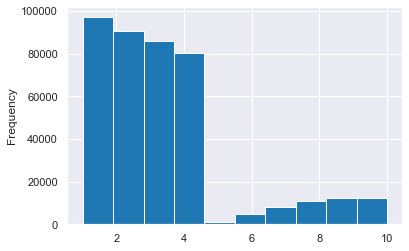

In [14]:
check_actor_df[(check_actor_df.category == 'actor') | (check_actor_df.category == 'actress')].ordering.plot(kind='hist')

### there is no common key in both imdb* and tmdb* movie raw data sets. hence, to find any matches between them is to loop over all tmdb* movies and then to produce a matching dictionary by comparing against Top 100 director namelists based on average rating.

In [15]:
tmdb_movies_df = csv_files_dict['tmdb_movies']
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
type(tmdb_movies_df['title'])

pandas.core.series.Series

In [17]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


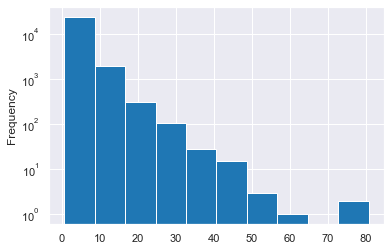

In [18]:
tmdb_movies_df.popularity.plot(kind='hist').set_yscale("log")

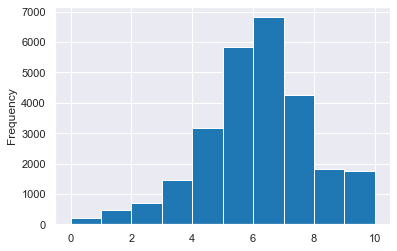

In [19]:
tmdb_movies_df.vote_average.plot(kind='hist')

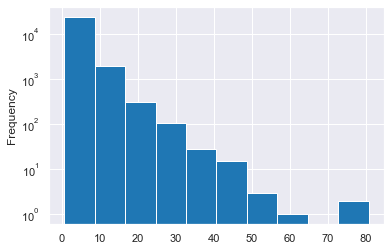

In [20]:
tmdb_movies_df.popularity.plot(kind='hist').set_yscale('log')

In [21]:
tmdb_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [22]:
tmdb_movies_df['release_date'].dtype

dtype('O')

# 1 Data Cleaning

## 1.1 Dealing with datatypes

In [23]:
### change dtype of columns
# we want to change the types of 3 columns. Good idea to write a function for this

def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$","").str.replace(",","").astype('float64')
    return df

In [24]:
def datetime_converter(df, col, da, db, dc):
    df[col] = pd.to_datetime(df[col], format='%{}-%{}-%{}'.format(da,db,dc))
    return df

In [25]:
tmdb_movies_df = datetime_converter(tmdb_movies_df, 'release_date', 'Y', 'm', 'd')

print(tmdb_movies_df['release_date'].dt.date[:2])
print(tmdb_movies_df['release_date'].dt.year[:2])
print(tmdb_movies_df['release_date'].dt.month[:2])
print(tmdb_movies_df['release_date'].dt.day[:2])

tmdb_movies_df['release_date'].dtype

0    2010-11-19
1    2010-03-26
Name: release_date, dtype: object
0    2010
1    2010
Name: release_date, dtype: int64
0    11
1     3
Name: release_date, dtype: int64
0    19
1    26
Name: release_date, dtype: int64


dtype('<M8[ns]')

## 1.2 Dealing with missing values
### 1.2.1 Removing empty columns from all dataframes

In [26]:
### scan through all columns and check portion of missing data
# we want to delete columns with more than 80% of data missing

def remove_empty_cols(df, col, cut):
    if df[col].isna().value_counts(normalize=True, sort=False)[0] < cut: # False < 20% (or True > 80%)
        print(f"\t col['{col}'] deleted b/c {round(100-df[col].isna().value_counts(normalize=True,sort=False)[0]*100,2)}% data missing.")
        df.drop(col, axis=1, inplace=True)
    else:
        print(f"\t col['{col}'] stayed.")
    return df

In [27]:
for nm, tb in csv_files_dict.items():
    print(f"\n")
    print(f"Viewing dataframe: {nm}")
    for tc in tb.columns:
        remove_empty_cols(tb, tc, 0.2) # if only less than 20% data, column removed. otherwise, kept! 



Viewing dataframe: imdb_name_basics
	 col['nconst'] stayed.
	 col['primary_name'] stayed.
	 col['birth_year'] deleted b/c 86.36% data missing.
	 col['death_year'] deleted b/c 98.88% data missing.
	 col['primary_profession'] stayed.
	 col['known_for_titles'] stayed.


Viewing dataframe: imdb_title_basics
	 col['tconst'] stayed.
	 col['primary_title'] stayed.
	 col['original_title'] stayed.
	 col['start_year'] stayed.
	 col['runtime_minutes'] stayed.
	 col['genres'] stayed.


Viewing dataframe: imdb_title_crew
	 col['tconst'] stayed.
	 col['directors'] stayed.
	 col['writers'] stayed.


Viewing dataframe: imdb_title_principals
	 col['tconst'] stayed.
	 col['ordering'] stayed.
	 col['nconst'] stayed.
	 col['category'] stayed.
	 col['job'] deleted b/c 82.72% data missing.
	 col['characters'] stayed.


Viewing dataframe: imdb_title_ratings
	 col['tconst'] stayed.
	 col['averagerating'] stayed.
	 col['numvotes'] stayed.


Viewing dataframe: tmdb_movies
	 col['Unnamed: 0'] stayed.
	 col['ge

### 1.2.2 Deleting one individual column (dim. reduction) completely from one dataframe

In [28]:
def remove_column(df, col):
    df.drop(col, axis=1, inplace=True)
    return df

### 1.2.3 Deleting one individual row (redundant removal) completely from one dataframe

In [29]:
def remove_row(df, rowidx):
    df.drop(rowidx, axis=0, inplace=True)
    return df

### 1.2.4 Deleting several empty rows from one given column in one dataframe

In [30]:
def remove_empty_rows(df, col, cut): # if less than 10% data missing in one given column, deleted. otherwise, kept!
    rm_rows = list(df[df[col].isna()==True].index)
    row_len = df.shape[0]
    print(f"empty row portion {round((len(rm_rows)/len(df[col]))*100,3)}% in col['{col}']")
    if len(rm_rows)/df.shape[0] < cut:
        df.dropna(subset=[col], how='any', thresh=1, inplace=True)
    now_len = df.shape[0]
    print(f"\t >>>>>> empty row portion {round(100-(now_len/row_len)*100,3)}% in col['{col}']")
    return df

### 1.2.5 Checking and Removing duplicated rows from all dataframes

In [31]:
# we require ALL duplicated rows be deleted

def check_duplicate_rows(df):
    df['is_duplicated'] = df.duplicated(subset=None, keep='first')
    if df.is_duplicated.value_counts(normalize=True, sort=False)[0] == 1: # 100% False 
        print(f'\t no duplicated rows found!')
        df.drop('is_duplicated', axis=1, inplace=True)
        return False
    else:
        print(f'\t duplicated rows found!')
        df.drop('is_duplicated', axis=1, inplace=True)
        return True

In [32]:
def remove_duplicate_rows(name, df):
    try:
        df.drop_duplicates()
        print(f"Dropped duplicated rows in dataframe {name}")
        
    except Exception as e:
        print(e)

In [33]:
for nm, tb in csv_files_dict.items():
    print(f"Viewing dataframe: {nm}")
    if check_duplicate_rows(tb):
        remove_duplicate_rows(nm, tb)

Viewing dataframe: imdb_name_basics
	 no duplicated rows found!
Viewing dataframe: imdb_title_basics
	 no duplicated rows found!
Viewing dataframe: imdb_title_crew
	 no duplicated rows found!
Viewing dataframe: imdb_title_principals
	 no duplicated rows found!
Viewing dataframe: imdb_title_ratings
	 no duplicated rows found!
Viewing dataframe: tmdb_movies
	 no duplicated rows found!
Viewing dataframe: tn_movie_budgets
	 no duplicated rows found!


### 1.2.6 Sorting one dataframe by one given column in descending way

In [34]:
def sorted_dataframe(df, col):
    df.sort_values(by=col, ascending=False, inplace=True)
    return df

## 1.3 Combining dataframes
### 1.3.1 Pandas merge

we want to combine five tables together. before doing that, lets check their dimensions.

In [35]:
print(csv_files_dict['imdb_title_ratings'].shape)
print(csv_files_dict['imdb_title_crew'].shape)
print(csv_files_dict['imdb_title_basics'].shape)
print(csv_files_dict['imdb_title_principals'].shape)
print(csv_files_dict['imdb_name_basics'].shape)

(73856, 3)
(146144, 3)
(146144, 6)
(1028186, 5)
(606648, 4)


In [36]:
names_df = pd.merge(csv_files_dict['imdb_name_basics'], csv_files_dict['imdb_title_principals'], on='nconst', how='inner')
print(names_df.shape)
names_df.head(20)

(1027912, 8)


,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,characters
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,9,producer,NaN
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,7,composer,NaN
2,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,8,composer,NaN
3,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2387710,8,composer,NaN
4,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,7,composer,NaN
5,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2749258,8,composer,NaN
6,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt3564200,9,composer,NaN
7,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898",tt6463956,4,actor,"[""Shecky""]"
8,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387",tt2547632,10,cinematographer,NaN
9,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387",tt7697870,8,cinematographer,NaN


In [37]:
genres_df = pd.merge(names_df, csv_files_dict['imdb_title_basics'], on='tconst', how='inner')
print(genres_df.shape)
genres_df.head(20)

(1027912, 13)


,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,characters,primary_title,original_title,start_year,runtime_minutes,genres
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,9,producer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"
1,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,5,director,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"
2,nm0449549,Jordan Kerner,"producer,actor,executive","tt0101921,tt0141369,tt0119190,tt0108333",tt2398241,10,producer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"
3,nm0962596,Pamela Ribon,"writer,producer,actress","tt0898332,tt3521164,tt5848272,tt2458776",tt2398241,7,writer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"
4,nm0678963,Peyo,"writer,director,music_department","tt2017020,tt0081933,tt0074539,tt0472181",tt2398241,8,writer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"
5,nm0542133,Joe Manganiello,"actor,stunts,producer","tt0974015,tt2268016,tt0844441,tt0837156",tt2398241,3,actor,"[""Hefty Smurf""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"
6,nm0933988,Rainn Wilson,"actor,producer,soundtrack","tt1512235,tt0467406,tt0386676,tt0465624",tt2398241,2,actor,"[""Gargamel""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"
7,nm1416215,Demi Lovato,"soundtrack,actress,music_department","tt0413573,tt1196339,tt1055366,tt1252374",tt2398241,1,actress,"[""Smurfette""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"
8,nm1632630,Stacey Harman,"writer,miscellaneous,producer","tt2398241,tt7221388,tt5662574,tt2712740",tt2398241,6,writer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"
9,nm1442113,Jack McBrayer,"actor,soundtrack,producer","tt0800039,tt0496424,tt0415306,tt1772341",tt2398241,4,actor,"[""Clumsy Smurf""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy"


In [38]:
directors_df = pd.merge(genres_df, csv_files_dict['imdb_title_crew'], on='tconst', how='inner')
print(directors_df.shape)
directors_df.head(20)

(1027912, 15)


,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,characters,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,9,producer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"
1,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,5,director,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"
2,nm0449549,Jordan Kerner,"producer,actor,executive","tt0101921,tt0141369,tt0119190,tt0108333",tt2398241,10,producer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"
3,nm0962596,Pamela Ribon,"writer,producer,actress","tt0898332,tt3521164,tt5848272,tt2458776",tt2398241,7,writer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"
4,nm0678963,Peyo,"writer,director,music_department","tt2017020,tt0081933,tt0074539,tt0472181",tt2398241,8,writer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"
5,nm0542133,Joe Manganiello,"actor,stunts,producer","tt0974015,tt2268016,tt0844441,tt0837156",tt2398241,3,actor,"[""Hefty Smurf""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"
6,nm0933988,Rainn Wilson,"actor,producer,soundtrack","tt1512235,tt0467406,tt0386676,tt0465624",tt2398241,2,actor,"[""Gargamel""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"
7,nm1416215,Demi Lovato,"soundtrack,actress,music_department","tt0413573,tt1196339,tt1055366,tt1252374",tt2398241,1,actress,"[""Smurfette""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"
8,nm1632630,Stacey Harman,"writer,miscellaneous,producer","tt2398241,tt7221388,tt5662574,tt2712740",tt2398241,6,writer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"
9,nm1442113,Jack McBrayer,"actor,soundtrack,producer","tt0800039,tt0496424,tt0415306,tt1772341",tt2398241,4,actor,"[""Clumsy Smurf""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963"


In [39]:
ratings_df = pd.merge(directors_df, csv_files_dict['imdb_title_ratings'], on='tconst', how='inner')
print(ratings_df.shape)
ratings_df.head(20)

(629598, 17)


,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,characters,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,9,producer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
1,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,5,director,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
2,nm0449549,Jordan Kerner,"producer,actor,executive","tt0101921,tt0141369,tt0119190,tt0108333",tt2398241,10,producer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
3,nm0962596,Pamela Ribon,"writer,producer,actress","tt0898332,tt3521164,tt5848272,tt2458776",tt2398241,7,writer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
4,nm0678963,Peyo,"writer,director,music_department","tt2017020,tt0081933,tt0074539,tt0472181",tt2398241,8,writer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
5,nm0542133,Joe Manganiello,"actor,stunts,producer","tt0974015,tt2268016,tt0844441,tt0837156",tt2398241,3,actor,"[""Hefty Smurf""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
6,nm0933988,Rainn Wilson,"actor,producer,soundtrack","tt1512235,tt0467406,tt0386676,tt0465624",tt2398241,2,actor,"[""Gargamel""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
7,nm1416215,Demi Lovato,"soundtrack,actress,music_department","tt0413573,tt1196339,tt1055366,tt1252374",tt2398241,1,actress,"[""Smurfette""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
8,nm1632630,Stacey Harman,"writer,miscellaneous,producer","tt2398241,tt7221388,tt5662574,tt2712740",tt2398241,6,writer,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
9,nm1442113,Jack McBrayer,"actor,soundtrack,producer","tt0800039,tt0496424,tt0415306,tt1772341",tt2398241,4,actor,"[""Clumsy Smurf""]",Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612


### 1.3.2 SQLite3 join 

In this project, I don't choose this approach to the tabular data combination.

## 1.4 Generating genre columns 
### 1.4.1 Adding genres separately  

In [40]:
def gen_genre_cols(df, col):
    
    all_genres = set()
    
    df[col] = df[col].apply(lambda x:x.split(',') if x else x)
    
    for gen in df[col]:
        if gen:
            all_genres.update(gen)
    
    for gen in all_genres:
        df[gen] = np.zeros(shape=df.shape[0])
        
    return df

### 1.4.2 Filling genres individually

In [41]:
def fill_genre_type(df, col):
    
    for idx, row in df.iterrows():
        if row[col]:
            for gen in row[col]:
                df.loc[idx, gen] = 1
            
    return df

### 1.4.3 Counting genres individually

In [42]:
def cal_genre_type(df, num):
    
    cols = list(df.columns)
    print(f"col list is {cols}")
    genres_cols = cols[num-1:]
    
    genre_count = dict()
    for gcol in genres_cols:
        count = np.sum(df[gcol] == 1).sum()
        genre_count[gcol] = count
        
    return genre_count

### 1.4.4 Rating directors individually

In [43]:
def cal_director_rate(df, num, grp):
    
    weight_dict = {}

    if grp == 'A':    
        weight_dict = {'Documentary': 5, 'Drama': 4, 'Comedy': 3, 'Biography': 2, 'Thriller': 1, 'Romance': 1}
    elif grp == 'B':
        weight_dict = {'Drama': 5, 'Documentary': 4,'Comedy': 3, 'Biography': 2, 'Thriller': 1, 'Romance': 1}      
    elif grp == 'C':
        weight_dict = {'Drama': 5, 'Comedy': 4, 'Documentary': 3,'Romance': 2, 'Biography': 1, 'Thriller': 1}
    elif grp == 'D':
        weight_dict = {'Drama': 5,'Comedy': 4,'Romance': 3,'Thriller': 2, 'Documentary': 1, 'Biography': 1}
    else:
        print(f"You forgot assigning a movie rating group!\nNothing happened!!!")
        return weight_dict
        
    print(num)    
    cols = list(df.columns)
    print(f"col list is {cols}")
    genres_cols = cols[num-1:]
        
    for gcol in genres_cols:
        if gcol in weight_dict.keys():
            df[gcol] = df[gcol].map({1: weight_dict[gcol], 0: 0})
        else:
            print(f"genre {gcol} not weighted in group {grp} !")
            
    director_count = dict()
    top100_directors_namedict = dict()
    for idx, row in df.iterrows():
        for gcol in genres_cols:
            if row[gcol]:
                director_count[idx] = director_count.get(idx, 0) + int(row[gcol])
                
    top100_directors_namedict = {k:v for k,v in sorted(director_count.items(), key=lambda x:x[1], reverse=True)[:100]}
        
    return top100_directors_namedict

### 1.4.5 Retrieving Top 100 directors' movies 

In [44]:
def get_top_100_director_movie(df, dic):
    
    top_100_director_movies = dict()
    for idx, row in df.iterrows():
        if idx in dic.keys():
            top_100_director_movies.setdefault(idx,[]).append(row['primary_title'])
            
    return top_100_director_movies        

### 1.4.6 Matching Top 100 directors' movies to those with high profit margin

In [45]:
def match_top_100_director_mikemovie(dic, mlist):
    
    match_dict = {}
    
    for i in dic.items():
        for m in i[1]:
            if m in mlist:
                match_dict[i[0]] = match_dict.get(i[0], 0) + 1
            else:
                match_dict[i[0]] = match_dict.get(i[0], 0)
            
    return match_dict

### 1.4.7 Selecting Top 100 directors' movies that match to tabular movie raw data 

In [46]:
def match_top_100_director_rawmovie(dic, mdf):
    
    top100_match_dict = {}
    tmdb_movie_list = []
    
    for idx, row in mdf.iterrows():
        if row['title']:
            tmdb_movie_list.append(row['title'])
        
    for i in dic.items():
        for m in i[1]:
            if m in tmdb_movie_list:
                top100_match_dict.setdefault(i[0],[]).append(m)
    
    return top100_match_dict

### 1.4.8 Released dates of highly rated movies conducted by Top 100 directors

In [47]:
def year_count_top_100_director_rawmovie(dic, mdf):
    
    top100_year_count_dict = {}
    
    for idx, row in mdf.iterrows():
        for i in dic.items():
            if row['title'] in i[1]:
                top100_year_count_dict[row['release_date'].year] = top100_year_count_dict.get(row['release_date'].year, 0) + 1
    
    return top100_year_count_dict      

### 1.4.9 Vote average of highly rated movies conducted by Top 100 directors

In [176]:
def vote_top_100_director_rawmovie(dic, mdf):
    
    top100_vote_dict = {}
    
    for idx, row in mdf.iterrows():
        for i in dic.items():
            if row['title'] in i[1]:
                top100_vote_dict.setdefault(i[0],[]).append(row['vote_average'])
                
    sort_top100_vote_dict = {k:v for k,v in sorted(top100_vote_dict.items(), key=lambda x:np.sum(x[1]), reverse=True)}
                    
    return sort_top100_vote_dict 

### 1.4.10 Popularity of highly rated movies conducted by Top 100 directors

In [175]:
def pop_top_100_director_rawmovie(dic, mdf):
    
    top100_pop_dict = {}
    
    for idx, row in mdf.iterrows():
        for i in dic.items():
            if row['title'] in i[1]:
                top100_pop_dict.setdefault(i[0],[]).append(np.round(row['popularity'],3))
                
    sort_top100_pop_dict = {k:v for k,v in sorted(top100_pop_dict.items(), key=lambda x:np.sum(x[1]), reverse=True)}
                    
    return sort_top100_pop_dict

### 1.4.11 Showing primary profession for Top 100 directors

In [50]:
def cal_top_100_director_prof(df, col):
       
    df[col] = df[col].astype('str')
    df[col+'_prof'] = df[col].apply(lambda x:x.split(',') if x else x)
    
    top100_prof_count_dict = {}
    
    for profs in df[col+'_prof']:
        if profs:
            for prof in profs:
                top100_prof_count_dict[prof] = top100_prof_count_dict.get(prof, 0) + 1 
                
    top10_directors_profdict = {k:v for k,v in sorted(top100_prof_count_dict.items(), key=lambda x:x[1], reverse=True)[:11]}
    
    return top10_directors_profdict 

### 1.4.12 Evaluating correlation btw average votes and popularity for Top 100 directors 

{"genres": 
[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 80, "name": "Crime"}, {"id": 99, "name": "Documentary"}, 
{"id": 18, "name": "Drama"}, {"id": 10751, "name": "Family"}, {"id": 14, "name": "Fantasy"}, 
{"id": 36, "name": "History"}, {"id": 27, "name": "Horror"}, {"id": 10402, "name": "Music"}, 
{"id": 9648, "name": "Mystery"}, {"id": 10749, "name": "Romance"}, 
{"id": 878, "name": "Science Fiction"}, {"id": 10770, "name": "TV Movie"}, 
{"id": 53, "name": "Thriller"}, {"id": 10752, "name": "War"}, {"id": 37, "name": "Western"}]}

In [51]:
def cor_top_100_director_popVSvote(dic, mdf):
    
    vote_list = []
    popy_list = []
    vote_doc_list = []
    popy_doc_list = []
    vote_dra_list = []
    popy_dra_list = []
    vote_com_list = []
    popy_com_list = []
    vote_rom_list = []
    popy_rom_list = []
    vote_thr_list = []
    popy_thr_list = []
    vote_his_list = []
    popy_his_list = []
    
    for idx, row in mdf.iterrows():
        for i in dic.items():
            if row['title'] in i[1]:
                vote_list.append(row['vote_average'])
                popy_list.append(row['popularity'])
                if '99' in row['genre_ids']:
                    vote_doc_list.append(row['vote_average'])
                    popy_doc_list.append(row['popularity'])
                else:
                    vote_doc_list.append(0)
                    popy_doc_list.append(0)
                if '18' in row['genre_ids']:
                    vote_dra_list.append(row['vote_average'])
                    popy_dra_list.append(row['popularity'])
                else:
                    vote_dra_list.append(0)
                    popy_dra_list.append(0)
                if '35' in row['genre_ids']:
                    vote_com_list.append(row['vote_average'])
                    popy_com_list.append(row['popularity'])
                else:
                    vote_com_list.append(0)
                    popy_com_list.append(0)
                if '10749' in row['genre_ids']:
                    vote_rom_list.append(row['vote_average'])
                    popy_rom_list.append(row['popularity'])
                else:
                    vote_rom_list.append(0)
                    popy_rom_list.append(0)
                if '53' in row['genre_ids']:
                    vote_thr_list.append(row['vote_average'])
                    popy_thr_list.append(row['popularity'])
                else:
                    vote_thr_list.append(0)
                    popy_thr_list.append(0)
                if '36' in row['genre_ids']:
                    vote_his_list.append(row['vote_average'])
                    popy_his_list.append(row['popularity'])
                else:
                    vote_his_list.append(0)
                    popy_his_list.append(0)
    
    data = {'vote':vote_list,
            'popular':popy_list,
            'vote_doc':vote_doc_list,
            'popular_doc':popy_doc_list,
            'vote_dra':vote_dra_list,
            'popular_dra':popy_dra_list,
            'vote_com':vote_com_list,
            'popular_com':popy_com_list,
            'vote_rom':vote_rom_list,
            'popular_rom':popy_rom_list,
            'vote_thr':vote_thr_list,
            'popular_thr':popy_thr_list,
            'vote_his':vote_his_list,
            'popular_his':popy_his_list
           }
 
    df = pd.DataFrame(data)
                           
    return df

## 1.5 Creating plots

In [52]:
def top_5_bar_chart(dlist, cstr, maxR, minR, role, col):
    
    sns.set_context('notebook')
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,6))
    
    xlist = list(dlist.keys())
    ylist = list(dlist.values())
    ysum = np.sum(ylist).sum()
    print(f"sum:{ysum}")
    ynorm = np.divide(ylist, ysum)
    print(np.round(ynorm, 3))
    
    ax.bar(xlist, ynorm, color=cstr)
    ax.set_title('Top 5 {} for {} in rating range of {}-{}'.format(col, role, minR, maxR))
    ax.set_ylabel('Counts')

In [53]:
def top_100_bar_chart(dlist, cstr, maxR, minR, role):
    
    sns.set_context('notebook')
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(100,10))
    
    xlist = list(dlist.keys())
    ylist = list(dlist.values())
    
    ax.bar(xlist, ylist, color=cstr)
    ax.set_title('Top 100 {} for rating {}-{}'.format(role, minR, maxR))
    ax.set_ylabel('Credits')

In [170]:
def plot_bar_chart(dlist, cstr, maxR, minR, role, width):
    
    sns.set_context('notebook')
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width,6))
    
    xlist = list(dlist.keys())
    ylist = []
    
    ytype = list(type(i) for i in dlist.values())
    
    if ytype[0] == list:
        ylist = list(np.round(np.sum(i),3) for i in dlist.values())
    else:
        ylist = list(dlist.values())
    
    ax.bar(xlist, ylist, color=cstr)
    ax.set_yscale('log')
    ax.set_title('{} in rating range of {}-{}'.format(role, minR, maxR))
    ax.set_ylabel('Counts')

In [55]:
def plot_reg(df, xlist, ylist):
    
    g = sns.lmplot(x=xlist, y=ylist, data=df, markers=['v'])
    
    g.fig.set_figwidth(12)
    g.fig.set_figheight(6)

# 2 
## Question 2: 
## What Top 5 genres in different rating ranges are directors best known for?

In [56]:
directors_only_df = ratings_df[(ratings_df.ordering == 5) & (ratings_df.nconst == ratings_df.directors)]
print(directors_only_df.shape)
directors_only_df.head(20)

(50077, 17)


,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,characters,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes
1,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,5,director,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
11,nm0647487,Christopher Olness,"writer,producer,director","tt0160452,tt0117060,tt0433397,tt2410746",tt0433397,5,director,NaN,Satin,Satin,2011,84.0,"Comedy,Drama,Music",nm0647487,"nm0647487,nm0903200",4.7,214
32,nm0928832,Ethan Wiley,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2387710,5,director,NaN,Journey to the Forbidden Valley,Journey to the Forbidden Valley,2017,96.0,"Action,Adventure,Family",nm0928832,"nm0906901,nm0928832",5.4,50
42,nm0928832,Ethan Wiley,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2281215,5,director,NaN,Elf-Man,Elf-Man,2012,86.0,"Comedy,Family,Fantasy",nm0928832,"nm0928832,nm0420135",3.6,582
53,nm0038875,John Asher,"actor,director,producer","tt3564200,tt2749258,tt1401621,tt0368530",tt2749258,5,director,NaN,Somebody Marry Me,Somebody Marry Me,2013,101.0,"Comedy,Romance",nm0038875,nm0038875,4.9,56
67,nm0038875,John Asher,"actor,director,producer","tt3564200,tt2749258,tt1401621,tt0368530",tt3564200,5,director,NaN,Tooken,Tooken,2015,80.0,"Action,Comedy",nm0038875,"nm0887226,nm0038875,nm8357383",3.6,1388
72,nm0052045,Mirra Bank,"editor,director,producer","tt0253746,tt0316160,tt0074605,tt0085494",tt2547632,5,director,NaN,The Only Real Game,The Only Real Game,2013,82.0,"Documentary,Sport",nm0052045,NaN,7.3,23
104,nm1203596,Kim Mordaunt,"director,writer,actor","tt5390418,tt0326196,tt1444679,tt2178256",tt2178256,5,director,NaN,The Rocket,The Rocket,2013,96.0,Drama,nm1203596,nm1203596,7.3,2794
110,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5,director,NaN,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller",nm0062879,"nm1282374,nm2874544,nm2752054",6.4,256
120,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,5,director,NaN,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",nm0062879,"nm1288308,nm2752054,nm4037950,nm4059063",6.4,77


In [57]:
# delete empty rows from 'directors' column

row_len = directors_only_df.shape[0]
remove_empty_rows(directors_only_df, 'directors', 1.0)
print(directors_only_df.shape)
print(directors_only_df.directors.isna().value_counts())
print(round(directors_only_df.shape[0]/row_len,3))
directors_only_df.head(20)

empty row portion 0.0% in col['directors']
	 >>>>>> empty row portion 0.0% in col['directors']
(50077, 17)
False    50077
Name: directors, dtype: int64
1.0


C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,characters,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes
1,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,5,director,NaN,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,90.0,"Adventure,Animation,Comedy",nm0038432,"nm1632630,nm0962596,nm0678963",6.0,15612
11,nm0647487,Christopher Olness,"writer,producer,director","tt0160452,tt0117060,tt0433397,tt2410746",tt0433397,5,director,NaN,Satin,Satin,2011,84.0,"Comedy,Drama,Music",nm0647487,"nm0647487,nm0903200",4.7,214
32,nm0928832,Ethan Wiley,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2387710,5,director,NaN,Journey to the Forbidden Valley,Journey to the Forbidden Valley,2017,96.0,"Action,Adventure,Family",nm0928832,"nm0906901,nm0928832",5.4,50
42,nm0928832,Ethan Wiley,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2281215,5,director,NaN,Elf-Man,Elf-Man,2012,86.0,"Comedy,Family,Fantasy",nm0928832,"nm0928832,nm0420135",3.6,582
53,nm0038875,John Asher,"actor,director,producer","tt3564200,tt2749258,tt1401621,tt0368530",tt2749258,5,director,NaN,Somebody Marry Me,Somebody Marry Me,2013,101.0,"Comedy,Romance",nm0038875,nm0038875,4.9,56
67,nm0038875,John Asher,"actor,director,producer","tt3564200,tt2749258,tt1401621,tt0368530",tt3564200,5,director,NaN,Tooken,Tooken,2015,80.0,"Action,Comedy",nm0038875,"nm0887226,nm0038875,nm8357383",3.6,1388
72,nm0052045,Mirra Bank,"editor,director,producer","tt0253746,tt0316160,tt0074605,tt0085494",tt2547632,5,director,NaN,The Only Real Game,The Only Real Game,2013,82.0,"Documentary,Sport",nm0052045,NaN,7.3,23
104,nm1203596,Kim Mordaunt,"director,writer,actor","tt5390418,tt0326196,tt1444679,tt2178256",tt2178256,5,director,NaN,The Rocket,The Rocket,2013,96.0,Drama,nm1203596,nm1203596,7.3,2794
110,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5,director,NaN,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller",nm0062879,"nm1282374,nm2874544,nm2752054",6.4,256
120,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,5,director,NaN,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",nm0062879,"nm1288308,nm2752054,nm4037950,nm4059063",6.4,77


In [58]:
# making a list of all the cols where we want to delete

useless_cols = ['characters', 'runtime_minutes', 'writers']

for col in useless_cols:
    q2_ROI_df = remove_column(directors_only_df, col)
    
print(q2_ROI_df.shape)
q2_ROI_df.head()

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(50077, 14)


,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,directors,averagerating,numvotes
1,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,5,director,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,"Adventure,Animation,Comedy",nm0038432,6.0,15612
11,nm0647487,Christopher Olness,"writer,producer,director","tt0160452,tt0117060,tt0433397,tt2410746",tt0433397,5,director,Satin,Satin,2011,"Comedy,Drama,Music",nm0647487,4.7,214
32,nm0928832,Ethan Wiley,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2387710,5,director,Journey to the Forbidden Valley,Journey to the Forbidden Valley,2017,"Action,Adventure,Family",nm0928832,5.4,50
42,nm0928832,Ethan Wiley,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2281215,5,director,Elf-Man,Elf-Man,2012,"Comedy,Family,Fantasy",nm0928832,3.6,582
53,nm0038875,John Asher,"actor,director,producer","tt3564200,tt2749258,tt1401621,tt0368530",tt2749258,5,director,Somebody Marry Me,Somebody Marry Me,2013,"Comedy,Romance",nm0038875,4.9,56


In [59]:
q2_ROI_df.set_index('primary_name', inplace=True)
print(q2_ROI_df.shape)
q2_ROI_df.head(20)

(50077, 13)


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,directors,averagerating,numvotes
primary_name,,,,,,,,,,,,,
Kelly Asbury,nm0038432,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,5,director,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,"Adventure,Animation,Comedy",nm0038432,6.0,15612
Christopher Olness,nm0647487,"writer,producer,director","tt0160452,tt0117060,tt0433397,tt2410746",tt0433397,5,director,Satin,Satin,2011,"Comedy,Drama,Music",nm0647487,4.7,214
Ethan Wiley,nm0928832,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2387710,5,director,Journey to the Forbidden Valley,Journey to the Forbidden Valley,2017,"Action,Adventure,Family",nm0928832,5.4,50
Ethan Wiley,nm0928832,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2281215,5,director,Elf-Man,Elf-Man,2012,"Comedy,Family,Fantasy",nm0928832,3.6,582
John Asher,nm0038875,"actor,director,producer","tt3564200,tt2749258,tt1401621,tt0368530",tt2749258,5,director,Somebody Marry Me,Somebody Marry Me,2013,"Comedy,Romance",nm0038875,4.9,56
John Asher,nm0038875,"actor,director,producer","tt3564200,tt2749258,tt1401621,tt0368530",tt3564200,5,director,Tooken,Tooken,2015,"Action,Comedy",nm0038875,3.6,1388
Mirra Bank,nm0052045,"editor,director,producer","tt0253746,tt0316160,tt0074605,tt0085494",tt2547632,5,director,The Only Real Game,The Only Real Game,2013,"Documentary,Sport",nm0052045,7.3,23
Kim Mordaunt,nm1203596,"director,writer,actor","tt5390418,tt0326196,tt1444679,tt2178256",tt2178256,5,director,The Rocket,The Rocket,2013,Drama,nm1203596,7.3,2794
Ruel S. Bayani,nm0062879,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5,director,No Other Woman,No Other Woman,2011,"Drama,Romance,Thriller",nm0062879,6.4,256


In [60]:
# delete empty rows from 'genres' column

row_len = q2_ROI_df.shape[0]
remove_empty_rows(q2_ROI_df, 'genres', 1.0) # upper limit is 100%, all removed!
print(q2_ROI_df.shape)
print(q2_ROI_df.genres.isna().value_counts())
print(round(q2_ROI_df.shape[0]/row_len,3))
q2_ROI_df.head(20)

empty row portion 0.685% in col['genres']
	 >>>>>> empty row portion 0.685% in col['genres']
(49734, 13)
False    49734
Name: genres, dtype: int64
0.993


C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,directors,averagerating,numvotes
primary_name,,,,,,,,,,,,,
Kelly Asbury,nm0038432,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,5,director,Smurfs: The Lost Village,Smurfs: The Lost Village,2017,"Adventure,Animation,Comedy",nm0038432,6.0,15612
Christopher Olness,nm0647487,"writer,producer,director","tt0160452,tt0117060,tt0433397,tt2410746",tt0433397,5,director,Satin,Satin,2011,"Comedy,Drama,Music",nm0647487,4.7,214
Ethan Wiley,nm0928832,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2387710,5,director,Journey to the Forbidden Valley,Journey to the Forbidden Valley,2017,"Action,Adventure,Family",nm0928832,5.4,50
Ethan Wiley,nm0928832,"writer,director,producer","tt2281215,tt0093220,tt5794440,tt0150111",tt2281215,5,director,Elf-Man,Elf-Man,2012,"Comedy,Family,Fantasy",nm0928832,3.6,582
John Asher,nm0038875,"actor,director,producer","tt3564200,tt2749258,tt1401621,tt0368530",tt2749258,5,director,Somebody Marry Me,Somebody Marry Me,2013,"Comedy,Romance",nm0038875,4.9,56
John Asher,nm0038875,"actor,director,producer","tt3564200,tt2749258,tt1401621,tt0368530",tt3564200,5,director,Tooken,Tooken,2015,"Action,Comedy",nm0038875,3.6,1388
Mirra Bank,nm0052045,"editor,director,producer","tt0253746,tt0316160,tt0074605,tt0085494",tt2547632,5,director,The Only Real Game,The Only Real Game,2013,"Documentary,Sport",nm0052045,7.3,23
Kim Mordaunt,nm1203596,"director,writer,actor","tt5390418,tt0326196,tt1444679,tt2178256",tt2178256,5,director,The Rocket,The Rocket,2013,Drama,nm1203596,7.3,2794
Ruel S. Bayani,nm0062879,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5,director,No Other Woman,No Other Woman,2011,"Drama,Romance,Thriller",nm0062879,6.4,256


In [61]:
q2_sortedROI_df = sorted_dataframe(q2_ROI_df,'averagerating')
q2_sortedROI_df.head(20)

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,directors,averagerating,numvotes
primary_name,,,,,,,,,,,,,
Taylor Morden,nm4568586,"director,cinematographer,editor","tt7181770,tt8704802,tt8730716,tt6495800",tt8730716,5,director,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,Documentary,nm4568586,10.0,5
Emre Oran,nm8791543,"art_director,director,writer","tt8792694,tt7259300,tt6206180",tt7259300,5,director,Calamity Kevin,Calamity Kevin,2019,"Adventure,Comedy",nm8791543,10.0,6
Tristan David Luciotti,nm6925060,"actor,writer,producer","tt9378510,tt8342206,tt8353934,tt6170078",tt5344358,5,director,All Around Us,All Around Us,2019,Documentary,nm6925060,10.0,6
Loreto Di Cesare,nm7223265,"cinematographer,director,producer","tt10379142,tt4960818,tt6341118,tt4558306",tt4960818,5,director,Revolution Food,Revolution Food,2015,Documentary,nm7223265,10.0,8
Daniel Alexander,nm4166962,director,tt1770682,tt1770682,5,director,Freeing Bernie Baran,Freeing Bernie Baran,2010,"Crime,Documentary",nm4166962,10.0,5
Robert Tutak,nm1249950,"director,writer,producer","tt0493357,tt7227500,tt1636452,tt0332716",tt7227500,5,director,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,"Documentary,History",nm1249950,10.0,6
Chad Carpenter,nm6893562,"director,producer,miscellaneous","tt4176738,tt4944240",tt4944240,5,director,Dog Days in the Heartland,Dog Days in the Heartland,2017,Drama,nm6893562,10.0,5
Raphael Sbarge,nm0768620,"actor,director,producer","tt0086200,tt5798502,tt2402061,tt1843230",tt9747294,5,director,LA Foodways,LA Foodways,2019,Documentary,nm0768620,9.9,8
Andrew Jezard,nm10174241,"cinematographer,director,producer","tt9743544,tt9090276",tt9743544,5,director,The Wedding Present: Something Left Behind,The Wedding Present: Something Left Behind,2018,Documentary,nm10174241,9.9,8


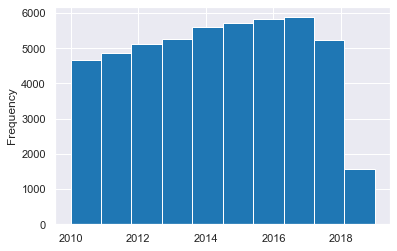

In [62]:
q2_sortedROI_df.start_year.plot(kind='hist')

In [63]:
q2_sortedROI_g1_df = q2_sortedROI_df[(q2_sortedROI_df.averagerating > 9.0) & (q2_sortedROI_df.averagerating <= 10.0)]
print(q2_sortedROI_g1_df.shape)
q2_sortedROI_g1_df_cols = q2_sortedROI_g1_df.shape[1]
q2_sortedROI_g1_df.head()

(425, 13)


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,directors,averagerating,numvotes
primary_name,,,,,,,,,,,,,
Taylor Morden,nm4568586,"director,cinematographer,editor","tt7181770,tt8704802,tt8730716,tt6495800",tt8730716,5,director,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,Documentary,nm4568586,10.0,5
Emre Oran,nm8791543,"art_director,director,writer","tt8792694,tt7259300,tt6206180",tt7259300,5,director,Calamity Kevin,Calamity Kevin,2019,"Adventure,Comedy",nm8791543,10.0,6
Tristan David Luciotti,nm6925060,"actor,writer,producer","tt9378510,tt8342206,tt8353934,tt6170078",tt5344358,5,director,All Around Us,All Around Us,2019,Documentary,nm6925060,10.0,6
Loreto Di Cesare,nm7223265,"cinematographer,director,producer","tt10379142,tt4960818,tt6341118,tt4558306",tt4960818,5,director,Revolution Food,Revolution Food,2015,Documentary,nm7223265,10.0,8
Daniel Alexander,nm4166962,director,tt1770682,tt1770682,5,director,Freeing Bernie Baran,Freeing Bernie Baran,2010,"Crime,Documentary",nm4166962,10.0,5


In [64]:
q2_sortedROI_g2_df = q2_sortedROI_df[(q2_sortedROI_df.averagerating > 8.0) & (q2_sortedROI_df.averagerating <= 9.0)]
print(q2_sortedROI_g2_df.shape)
q2_sortedROI_g2_df_cols = q2_sortedROI_g2_df.shape[1]
q2_sortedROI_g2_df.head()

(3592, 13)


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,directors,averagerating,numvotes
primary_name,,,,,,,,,,,,,
Julija Iruskinaite,nm7852874,"director,writer,producer",tt5343070,tt5343070,5,director,Four Wise Monkeys,Four Wise Monkeys,2016,"Drama,Mystery",nm7852874,9.0,18
Hugh Macdonald,nm9394477,director,tt7595528,tt7595528,5,director,No Ordinary Sheila,No Ordinary Sheila,2017,Documentary,nm9394477,9.0,9
Mateo Zoni,nm5014457,"director,writer,producer","tt2371507,tt2664198,tt4761466,tt6129124",tt6129124,5,director,Il Club dei 27,Il Club dei 27,2017,"Biography,Documentary",nm5014457,9.0,6
Cheryl Eagan-Donovan,nm3669722,"miscellaneous,director,writer","tt4459424,tt1537181,tt0118590",tt4459424,5,director,Nothing Is Truer than Truth,Nothing Is Truer than Truth,2018,"Biography,Documentary,History",nm3669722,9.0,5
Michael Stillwater,nm4700587,"director,cinematographer,camera_department","tt2546396,tt5539438,tt2073077",tt2073077,5,director,Shining Night: A Portrait of Composer Morten L...,Shining Night: A Portrait of Composer Morten L...,2012,"Biography,Documentary,Music",nm4700587,9.0,35


In [65]:
q2_sortedROI_g3_df = q2_sortedROI_df[(q2_sortedROI_df.averagerating > 7.0) & (q2_sortedROI_df.averagerating <= 8.0)]
print(q2_sortedROI_g3_df.shape)
q2_sortedROI_g3_df_cols = q2_sortedROI_g3_df.shape[1]
q2_sortedROI_g3_df.head()

(9534, 13)


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,directors,averagerating,numvotes
primary_name,,,,,,,,,,,,,
Gajendra Ahire,nm2243359,"director,writer,editor","tt5904818,tt7734662,tt2511530,tt0833441",tt7734662,5,director,Pimpal,Pimpal,2017,Drama,nm2243359,8.0,63
Mike Lombardo,nm3105152,"producer,director,writer","tt7288442,tt7280724,tt7280730,tt3990380",tt7288442,5,director,I'm Dreaming of a White Doomsday,I'm Dreaming of a White Doomsday,2017,"Drama,Horror",nm3105152,8.0,89
Ranji Vijayan,nm6933212,"director,actor,writer","tt4668824,tt8308034,tt4222112",tt8308034,5,director,Swapnarajyam,Swapnarajyam,2019,"Comedy,Drama,Romance",nm6933212,8.0,6
Batbayar Chogsom,nm7676629,"director,writer,producer","tt5139492,tt8310282",tt8310282,5,director,Out of Paradise,Out of Paradise,2018,Drama,nm7676629,8.0,19
Victor Cubillos,nm3839359,"writer,producer,director","tt2070882,tt4621594,tt5117638,tt1521679",tt1521679,5,director,April 31st,April 31st,2010,"Biography,Documentary,Drama",nm3839359,8.0,53


In [66]:
q2_sortedROI_g4_df = q2_sortedROI_df[(q2_sortedROI_df.averagerating > 6.0) & (q2_sortedROI_df.averagerating <= 7.0)]
print(q2_sortedROI_g4_df.shape)
q2_sortedROI_g4_df_cols = q2_sortedROI_g4_df.shape[1]
q2_sortedROI_g4_df.head()

(14809, 13)


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,directors,averagerating,numvotes
primary_name,,,,,,,,,,,,,
David Campion,nm3364270,"writer,director,producer","tt4851658,tt1394360,tt2578066,tt6475736",tt2578066,5,director,Woodfalls,Woodfalls,2014,Drama,nm3364270,7.0,34
Javier Mujica,nm1137409,"assistant_director,director,writer","tt0291403,tt5627990,tt0111071,tt3704074",tt3704074,5,director,The 86,The 86,2017,"Action,Biography,Crime",nm1137409,7.0,7
Kathryn Lee Moss,nm5164020,"director,writer","tt3763398,tt2274538",tt2274538,5,director,Resistance Movement,Resistance Movement,2013,"Drama,History,War",nm5164020,7.0,72
Kane Guglielmi,nm2287669,"director,producer,editor","tt0094481,tt1387151,tt4937112",tt4937112,5,director,Cooped Up,Cooped Up,2016,"Comedy,Drama,Romance",nm2287669,7.0,40
Alexis Durand-Brault,nm0105680,"director,cinematographer,assistant_director","tt1132285,tt0400400,tt6541904,tt9573292",tt3025410,5,director,The Little Queen,La petite reine,2014,"Biography,Drama,Sport",nm0105680,7.0,428


# * Group 1: rating range from 9.0 to 10.0

In [67]:
q2_sortedROI_g1_genres_df = gen_genre_cols(q2_sortedROI_g1_df, 'genres')
#print(q2_sortedROI_g1_df['genres'].dtype)
print(q2_sortedROI_g1_genres_df.shape)
q2_sortedROI_g1_genres_df.head()

(425, 35)


C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,...,Horror,Animation,Mystery,Action,Music,Fantasy,Sci-Fi,Family,Adventure,Musical
primary_name,,,,,,,,,,,,,,,,,,,,,
Taylor Morden,nm4568586,"director,cinematographer,editor","tt7181770,tt8704802,tt8730716,tt6495800",tt8730716,5,director,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,[Documentary],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Emre Oran,nm8791543,"art_director,director,writer","tt8792694,tt7259300,tt6206180",tt7259300,5,director,Calamity Kevin,Calamity Kevin,2019,"[Adventure, Comedy]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tristan David Luciotti,nm6925060,"actor,writer,producer","tt9378510,tt8342206,tt8353934,tt6170078",tt5344358,5,director,All Around Us,All Around Us,2019,[Documentary],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loreto Di Cesare,nm7223265,"cinematographer,director,producer","tt10379142,tt4960818,tt6341118,tt4558306",tt4960818,5,director,Revolution Food,Revolution Food,2015,[Documentary],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daniel Alexander,nm4166962,director,tt1770682,tt1770682,5,director,Freeing Bernie Baran,Freeing Bernie Baran,2010,"[Crime, Documentary]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
q2_sortedROI_g1_genres_df = fill_genre_type(q2_sortedROI_g1_genres_df, 'genres')
print(q2_sortedROI_g1_genres_df.shape)
q2_sortedROI_g1_genres_df.head()

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(425, 35)


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,...,Horror,Animation,Mystery,Action,Music,Fantasy,Sci-Fi,Family,Adventure,Musical
primary_name,,,,,,,,,,,,,,,,,,,,,
Taylor Morden,nm4568586,"director,cinematographer,editor","tt7181770,tt8704802,tt8730716,tt6495800",tt8730716,5,director,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,[Documentary],...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Emre Oran,nm8791543,"art_director,director,writer","tt8792694,tt7259300,tt6206180",tt7259300,5,director,Calamity Kevin,Calamity Kevin,2019,"[Adventure, Comedy]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Tristan David Luciotti,nm6925060,"actor,writer,producer","tt9378510,tt8342206,tt8353934,tt6170078",tt5344358,5,director,All Around Us,All Around Us,2019,[Documentary],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loreto Di Cesare,nm7223265,"cinematographer,director,producer","tt10379142,tt4960818,tt6341118,tt4558306",tt4960818,5,director,Revolution Food,Revolution Food,2015,[Documentary],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daniel Alexander,nm4166962,director,tt1770682,tt1770682,5,director,Freeing Bernie Baran,Freeing Bernie Baran,2010,"[Crime, Documentary]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
q2_sortedROI_g1_genres_df.drop('genres', axis=1, inplace=True)

In [70]:
q2_g1_genres_dict = cal_genre_type(q2_sortedROI_g1_genres_df, q2_sortedROI_g1_df_cols)
q2_g1_genres_dict

col list is ['nconst', 'primary_profession', 'known_for_titles', 'tconst', 'ordering', 'category', 'primary_title', 'original_title', 'start_year', 'directors', 'averagerating', 'numvotes', 'Drama', 'Romance', 'Thriller', 'Crime', 'History', 'Biography', 'War', 'News', 'Documentary', 'Western', 'Comedy', 'Sport', 'Horror', 'Animation', 'Mystery', 'Action', 'Music', 'Fantasy', 'Sci-Fi', 'Family', 'Adventure', 'Musical']


{'Drama': 149,
 'Romance': 8,
 'Thriller': 1,
 'Crime': 11,
 'History': 16,
 'Biography': 32,
 'War': 4,
 'News': 2,
 'Documentary': 242,
 'Western': 1,
 'Comedy': 50,
 'Sport': 21,
 'Horror': 2,
 'Animation': 1,
 'Mystery': 7,
 'Action': 11,
 'Music': 29,
 'Fantasy': 4,
 'Sci-Fi': 2,
 'Family': 25,
 'Adventure': 12,
 'Musical': 5}

#### Top 5 genres of movies in rating range 9.0 - 10.0

In [71]:
top5_g1_genres = sorted(q2_g1_genres_dict, key=q2_g1_genres_dict.get, reverse=True)[:5]
top5_g1_genres

['Documentary', 'Drama', 'Comedy', 'Biography', 'Music']

In [72]:
top5_g1_genres_dict = {k:v for k,v in sorted(q2_g1_genres_dict.items(), key=lambda x:x[1], reverse=True)[:5]}
top5_g1_genres_dict

{'Documentary': 242, 'Drama': 149, 'Comedy': 50, 'Biography': 32, 'Music': 29}

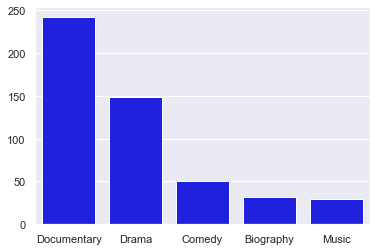

In [73]:
sns.barplot(x=list(top5_g1_genres_dict.keys()), y=list(top5_g1_genres_dict.values()), color='blue')

sum:502
[0.482 0.297 0.1   0.064 0.058]


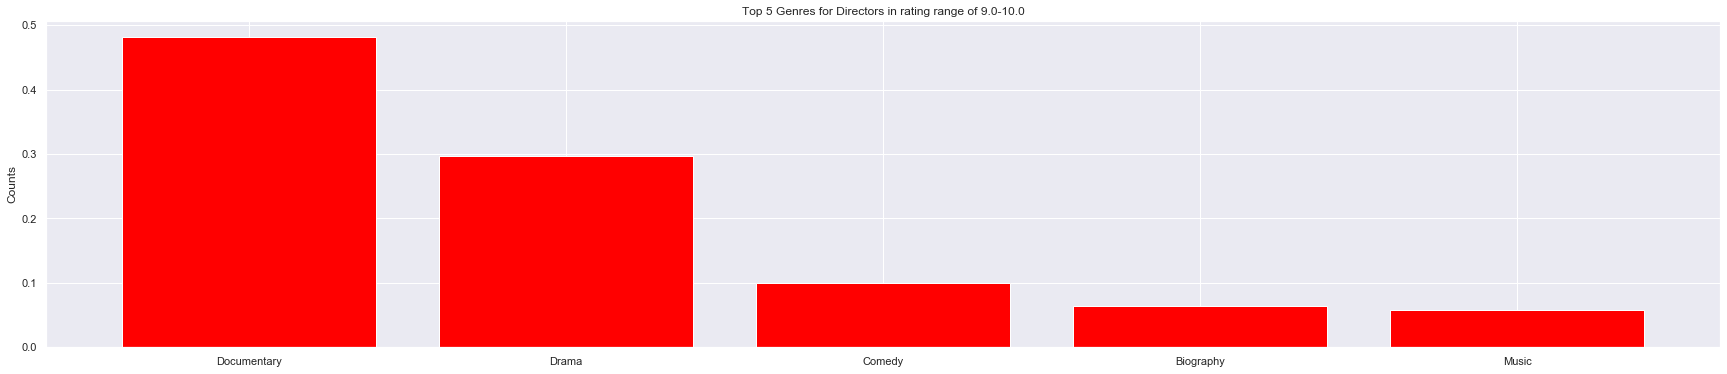

In [74]:
top_5_bar_chart(top5_g1_genres_dict, 'red', 10.0, 9.0, 'Directors', 'Genres')

# Who're Top 100 directors in voted rating range: 9.0-10.0?

In [75]:
q2_gA_directors_dict = cal_director_rate(q2_sortedROI_g1_genres_df, q2_sortedROI_g1_df_cols, 'A')
q2_gA_directors_dict

13
col list is ['nconst', 'primary_profession', 'known_for_titles', 'tconst', 'ordering', 'category', 'primary_title', 'original_title', 'start_year', 'directors', 'averagerating', 'numvotes', 'Drama', 'Romance', 'Thriller', 'Crime', 'History', 'Biography', 'War', 'News', 'Documentary', 'Western', 'Comedy', 'Sport', 'Horror', 'Animation', 'Mystery', 'Action', 'Music', 'Fantasy', 'Sci-Fi', 'Family', 'Adventure', 'Musical']
genre Crime not weighted in group A !
genre History not weighted in group A !
genre War not weighted in group A !
genre News not weighted in group A !
genre Western not weighted in group A !
genre Sport not weighted in group A !
genre Horror not weighted in group A !
genre Animation not weighted in group A !
genre Mystery not weighted in group A !
genre Action not weighted in group A !
genre Music not weighted in group A !
genre Fantasy not weighted in group A !
genre Sci-Fi not weighted in group A !
genre Family not weighted in group A !
genre Adventure not weighted 

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'Jonathon Link': 20,
 'Taylor Morden': 16,
 'Linda Palmer': 16,
 'Joey Daoud': 12,
 'Luke Coffee': 12,
 'Gregg R. Simpson': 12,
 'Horne Brothers': 11,
 'Mark Bashian': 11,
 'Sasha Waters Freyer': 11,
 'Sean Durant': 11,
 'Luca Guardabascio': 11,
 'Randall Moore': 11,
 'Hamid Benamra': 10,
 'Keli Price': 10,
 'Paul Michael Bloodgood': 10,
 'Isaac Olsen': 10,
 'Karen Gehres': 10,
 'Slaven Zimbrek': 10,
 'Mike Erickson': 10,
 'Hadzi-Aleksandar Djurovic': 10,
 'Milos Twilight': 10,
 'Tim Warren': 10,
 'Rob Gabriele': 10,
 'Joe Heslinga': 9,
 'Antonis Tolakis': 9,
 'Naomi Smyth': 9,
 'Himesh Bhargo': 9,
 'Allison Kuznia': 9,
 'Joseph East': 9,
 'Laurits Munch-Petersen': 9,
 'Daniel Nelson': 9,
 'Thomas Hartmann': 9,
 'Susan Sfarra': 9,
 'Sven Sauer': 9,
 'Sudheer Shanbhogue': 8,
 'Amr Gamal': 8,
 'Vyacheslav Bihun': 8,
 'Felicia Giouzelis': 8,
 'Josh Jensen': 8,
 'Ryan Worsley': 8,
 'Jerome Walter Gueguen': 8,
 "Anne Davis O'Neal": 8,
 "Ronan O'Rahilly": 8,
 'Chris Berg': 8,
 'Sonny Quinn'

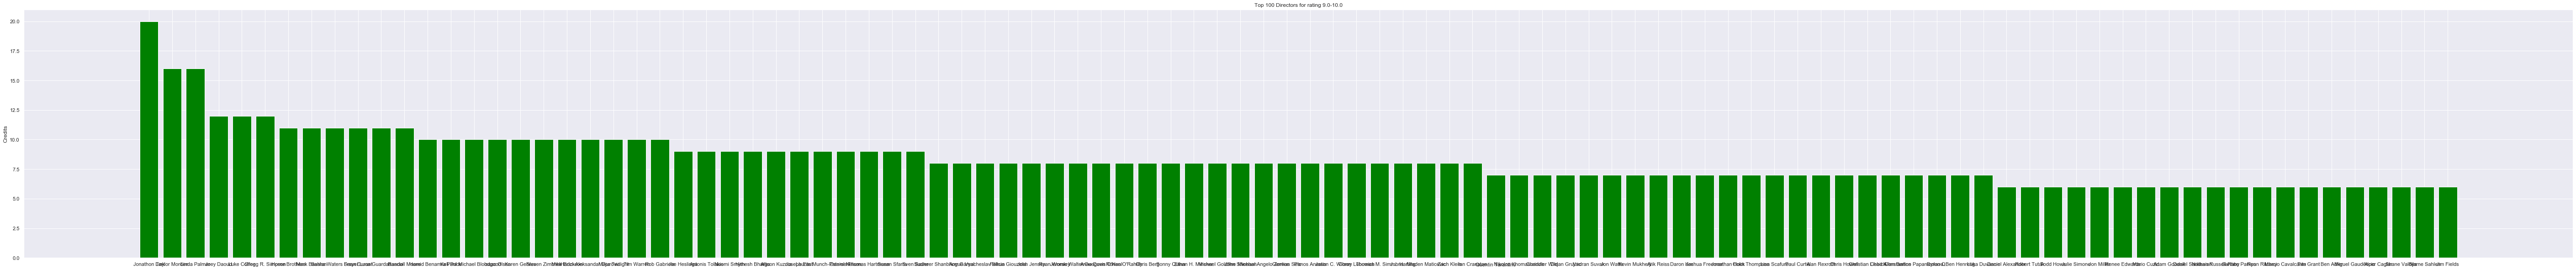

In [76]:
top_100_bar_chart(q2_gA_directors_dict, 'green', 10.0, 9.0, 'Directors')

## Who're Top 100 directors and what're their conducted movies?

In [77]:
q2_gA_directors_movies_dict = get_top_100_director_movie(q2_sortedROI_g1_genres_df, q2_gA_directors_dict)
q2_gA_directors_movies_dict

{'Taylor Morden': ["Pick It Up! - Ska in the '90s",
  "Here's To Life: The Story of the Refreshments"],
 'Daniel Alexander': ['Freeing Bernie Baran'],
 'Robert Tutak': ['Ellis Island: The Making of a Master Race in America'],
 'Todd Howe': ['RISE: The Story of Augustines'],
 'Hamid Benamra': ['Pieces of Lives, Pieces of Dreams', 'Hizam'],
 'Quentin Tarantino': ['Once Upon a Time ... in Hollywood'],
 'Joe Heslinga': ['Foosballers'],
 'Keli Price': ['On Thin Ice'],
 'Nikoloz Khomasuridze': ['Ekvtime: Man of God'],
 'Paul Michael Bloodgood': ['Trenches of Rock'],
 'Julie Simone': ["Fiddlin'"],
 'Sudheer Shanbhogue': ['Ananthu V/S Nusrath'],
 'Jon Miller': ['Strung Together'],
 'Renee Edwards': ['One Note at a Time'],
 'Linda Palmer': ['Turnover', "Sienna's Choice"],
 'Amr Gamal': ['10 Days Before the Wedding'],
 'Vyacheslav Bihun': ["Mama's Heart. Gongadze"],
 'Mario Cuzic': ["Garage Rockin' Craze"],
 'Horne Brothers': ['The Start of Dreams'],
 'Antonis Tolakis': ['Voiceless'],
 'Adam Goo

## Could we find any match from Top 100 (imdb) to Mike's list (tmdb)?

In [78]:
q2_gA_directors_Mikemovies_dict = match_top_100_director_mikemovie(q2_gA_directors_movies_dict, mike_movies_list)
q2_gA_directors_Mikemovies_dict

{'Taylor Morden': 0,
 'Daniel Alexander': 0,
 'Robert Tutak': 0,
 'Todd Howe': 0,
 'Hamid Benamra': 0,
 'Quentin Tarantino': 0,
 'Joe Heslinga': 0,
 'Keli Price': 0,
 'Nikoloz Khomasuridze': 0,
 'Paul Michael Bloodgood': 0,
 'Julie Simone': 0,
 'Sudheer Shanbhogue': 0,
 'Jon Miller': 0,
 'Renee Edwards': 0,
 'Linda Palmer': 0,
 'Amr Gamal': 0,
 'Vyacheslav Bihun': 0,
 'Mario Cuzic': 0,
 'Horne Brothers': 0,
 'Antonis Tolakis': 0,
 'Adam Goodall': 0,
 'Daniel Sarkissian': 0,
 'Naomi Smyth': 0,
 'Nathan Russell-Raby': 0,
 'Santino Panico': 0,
 'Himesh Bhargo': 0,
 'Ryan Ritchey': 0,
 'Marcio Cavalcante': 0,
 'Tim Grant': 0,
 'Ben Adler': 0,
 'Felicia Giouzelis': 0,
 'Chandler Wild': 0,
 'Miguel Gaudêncio': 0,
 'Dejan Grujcic': 0,
 'Josh Jensen': 0,
 'Allison Kuznia': 0,
 'Jonathon Link': 0,
 'Alper Caglar': 0,
 'Shane Valdés': 0,
 'Vedran Suvak': 0,
 'Jon Watts': 0,
 'Bjarne Sahlen': 0,
 'Kevin Mukherji': 0,
 'Joseph East': 0,
 'Ryan Worsley': 0,
 'Joey Daoud': 0,
 'Luke Coffee': 0,
 'Ar

## Could we find any matches from Top 100 (imdb) to tmdb movie set?

In [79]:
q2_gA_directors_tmdbmovies_dict = match_top_100_director_rawmovie(q2_gA_directors_movies_dict, tmdb_movies_df)
q2_gA_directors_tmdbmovies_dict

{'Taylor Morden': ["Here's To Life: The Story of the Refreshments"],
 'Santino Panico': ['From the Ground Up'],
 'Jonathon Link': ["Travis: A Soldier's Story"],
 'Joseph East': ['I Will Dance'],
 'Mark Bashian': ['Walk On'],
 'Jonathan Hock': ['Off the Rez'],
 'Isaac Olsen': ['Strictly Sacred: The Story of Girl Trouble'],
 'Daniel Nelson': ['Hoodslam: The Accidental Phenomenon'],
 'Chad Allen Barton': ['Lights Camera Bullshit'],
 'Corey Lubowich': ['Spies Are Forever'],
 'Zach Klein': ['The Scientist: Are We Missing Something?']}

In [80]:
q2_gA_directors_tmdbmovies_year_dict = year_count_top_100_director_rawmovie(q2_gA_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gA_directors_tmdbmovies_year_dict

{2011: 1, 2013: 2, 2014: 2, 2015: 2, 2016: 1, 2017: 2, 2018: 1}

## What're released years for movies conducted by Top 100 directors?
### * info of movie released years relies on tmdb movie data set

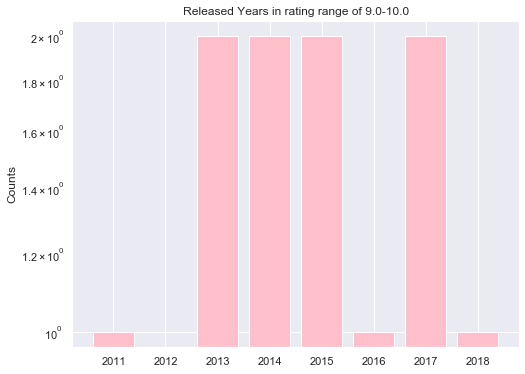

In [171]:
plot_bar_chart(q2_gA_directors_tmdbmovies_year_dict, 'pink', 10.0, 9.0, 'Released Years', 8)

## What's overall average vote for movies conducted by Top 100 directors?
### * info of movie average votes relies on tmdb movie data set

In [177]:
q2_gA_directors_tmdbmovies_vote_dict = vote_top_100_director_rawmovie(q2_gA_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gA_directors_tmdbmovies_vote_dict

{'Zach Klein': [10.0],
 'Corey Lubowich': [10.0],
 'Taylor Morden': [10.0],
 'Chad Allen Barton': [10.0],
 'Jonathon Link': [9.3],
 'Jonathan Hock': [9.0],
 'Isaac Olsen': [9.0],
 'Santino Panico': [7.0],
 'Mark Bashian': [5.0],
 'Daniel Nelson': [1.0],
 'Joseph East': [0.0]}

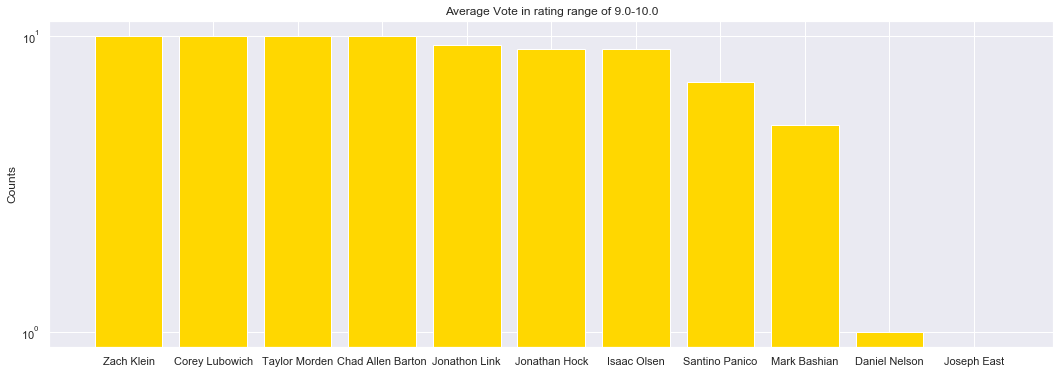

In [178]:
plot_bar_chart(q2_gA_directors_tmdbmovies_vote_dict, 'gold', 10.0, 9.0, 'Average Vote', 18)

## How popular are movies conducted by Top 100 directors?
### * info of movie popularity relies on tmdb movie data set

In [179]:
q2_gA_directors_tmdbmovies_popularity_dict = pop_top_100_director_rawmovie(q2_gA_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gA_directors_tmdbmovies_popularity_dict

{'Zach Klein': [1.388],
 'Jonathon Link': [0.991],
 'Joseph East': [0.661],
 'Jonathan Hock': [0.6],
 'Mark Bashian': [0.6],
 'Isaac Olsen': [0.6],
 'Daniel Nelson': [0.6],
 'Corey Lubowich': [0.6],
 'Taylor Morden': [0.6],
 'Santino Panico': [0.6],
 'Chad Allen Barton': [0.6]}

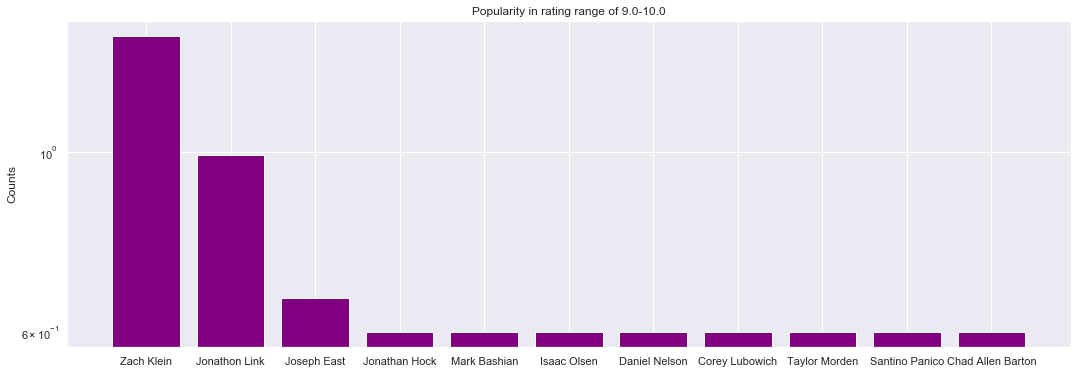

In [180]:
plot_bar_chart(q2_gA_directors_tmdbmovies_popularity_dict, 'purple', 10.0, 9.0, 'Popularity', 18)

## What're primary professions for Top 100 directors?
### * info of director primary profession relies on tmdb movie data set

In [86]:
#q2_sortedROI_g1_df['primary_profession'] = q2_sortedROI_g1_df['primary_profession'].astype('str')
#q2_sortedROI_g1_df['primary_profession'] = q2_sortedROI_g1_df['primary_profession'].apply(lambda x:x.split(',') if x else x)

In [87]:
q2_gA_directors_prof_dict = cal_top_100_director_prof(q2_sortedROI_g1_df, 'primary_profession')
q2_gA_directors_prof_dict

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


{'director': 383,
 'writer': 254,
 'producer': 216,
 'editor': 97,
 'cinematographer': 66,
 'actor': 59,
 'miscellaneous': 26,
 'camera_department': 24,
 'assistant_director': 17,
 'sound_department': 10,
 'editorial_department': 8}

sum:1160
[0.33  0.219 0.186 0.084 0.057 0.051 0.022 0.021 0.015 0.009 0.007]


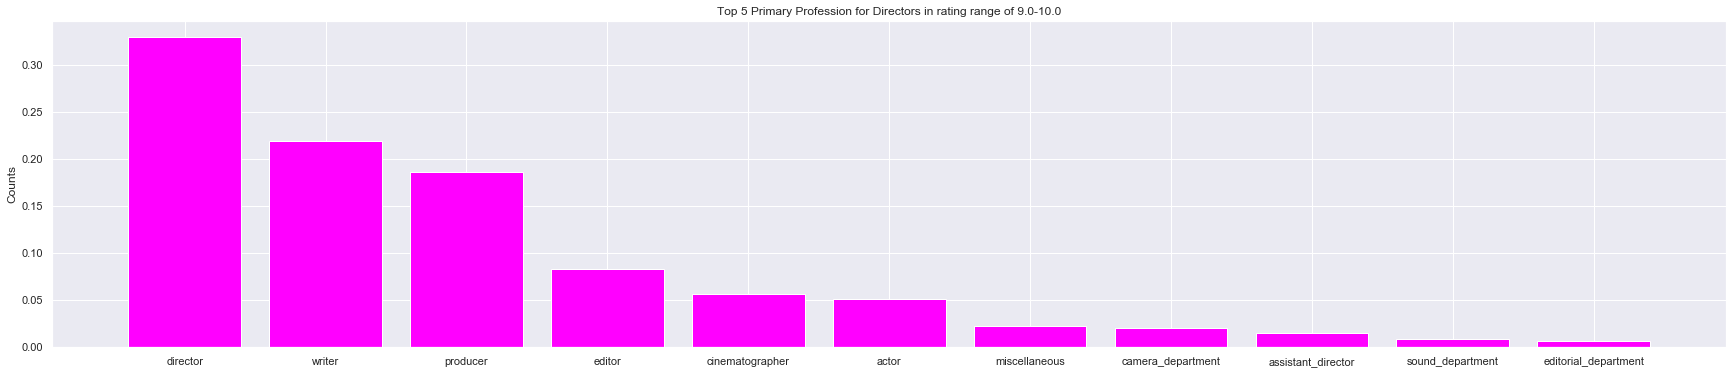

In [88]:
top_5_bar_chart(q2_gA_directors_prof_dict, 'magenta', 10.0, 9.0, 'Directors', 'Primary Profession')

## What's correlation btw vote & popuarity over genres for Top 100 directors?
### * info of vote, popularity, genre relies on tmdb movie data set

In [89]:
q2_gA_directors_tmdbmovies_df = cor_top_100_director_popVSvote(q2_gA_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gA_directors_tmdbmovies_df.head(10)

,vote,popular,vote_doc,popular_doc,vote_dra,popular_dra,vote_com,popular_com,vote_rom,popular_rom,vote_thr,popular_thr,vote_his,popular_his
0,9.0,0.600,9.0,0.600,0.0,0.000,0.0,0.0,0,0,0,0,0,0
1,9.3,0.991,0.0,0.000,0.0,0.000,0.0,0.0,0,0,0,0,0,0
2,5.0,0.600,0.0,0.000,0.0,0.000,0.0,0.0,0,0,0,0,0,0
3,9.0,0.600,0.0,0.000,0.0,0.000,0.0,0.0,0,0,0,0,0,0
4,1.0,0.600,1.0,0.600,0.0,0.000,0.0,0.0,0,0,0,0,0,0
5,10.0,1.388,10.0,1.388,0.0,0.000,0.0,0.0,0,0,0,0,0,0
6,0.0,0.661,0.0,0.661,0.0,0.661,0.0,0.0,0,0,0,0,0,0
7,10.0,0.600,0.0,0.000,0.0,0.000,10.0,0.6,0,0,0,0,0,0
8,10.0,0.600,10.0,0.600,0.0,0.000,0.0,0.0,0,0,0,0,0,0
9,7.0,0.600,7.0,0.600,0.0,0.000,0.0,0.0,0,0,0,0,0,0


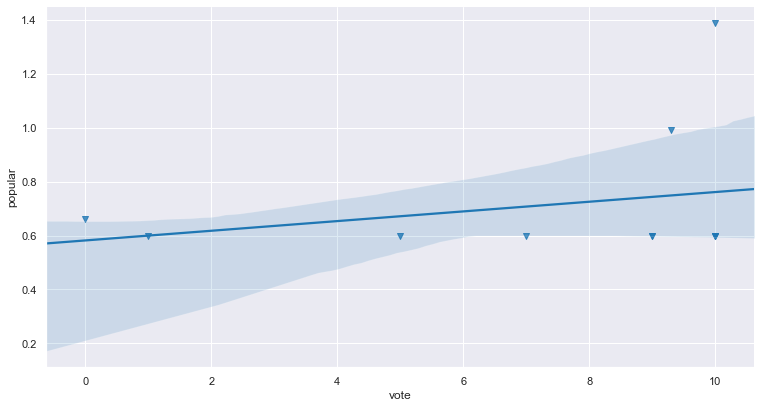

In [90]:
plot_reg(q2_gA_directors_tmdbmovies_df, 'vote', 'popular')

# Conclusion:

## * Director's primary profession is irrelevant to movie genres
## * More popular movies tend to attract more votes

# * Group 2: rating range from 8.0 to 9.0

In [91]:
q2_sortedROI_g2_genres_df = gen_genre_cols(q2_sortedROI_g2_df, 'genres')
print(q2_sortedROI_g2_genres_df.shape)
q2_sortedROI_g2_genres_df.head()

(3592, 38)


C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,...,Action,Music,Game-Show,Short,Fantasy,Sci-Fi,Family,Adventure,Musical,Reality-TV
primary_name,,,,,,,,,,,,,,,,,,,,,
Julija Iruskinaite,nm7852874,"director,writer,producer",tt5343070,tt5343070,5,director,Four Wise Monkeys,Four Wise Monkeys,2016,"[Drama, Mystery]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hugh Macdonald,nm9394477,director,tt7595528,tt7595528,5,director,No Ordinary Sheila,No Ordinary Sheila,2017,[Documentary],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mateo Zoni,nm5014457,"director,writer,producer","tt2371507,tt2664198,tt4761466,tt6129124",tt6129124,5,director,Il Club dei 27,Il Club dei 27,2017,"[Biography, Documentary]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cheryl Eagan-Donovan,nm3669722,"miscellaneous,director,writer","tt4459424,tt1537181,tt0118590",tt4459424,5,director,Nothing Is Truer than Truth,Nothing Is Truer than Truth,2018,"[Biography, Documentary, History]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michael Stillwater,nm4700587,"director,cinematographer,camera_department","tt2546396,tt5539438,tt2073077",tt2073077,5,director,Shining Night: A Portrait of Composer Morten L...,Shining Night: A Portrait of Composer Morten L...,2012,"[Biography, Documentary, Music]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
q2_sortedROI_g2_genres_df = fill_genre_type(q2_sortedROI_g2_genres_df, 'genres')
print(q2_sortedROI_g2_genres_df.shape)
q2_sortedROI_g2_genres_df.head()

(3592, 38)


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,...,Action,Music,Game-Show,Short,Fantasy,Sci-Fi,Family,Adventure,Musical,Reality-TV
primary_name,,,,,,,,,,,,,,,,,,,,,
Julija Iruskinaite,nm7852874,"director,writer,producer",tt5343070,tt5343070,5,director,Four Wise Monkeys,Four Wise Monkeys,2016,"[Drama, Mystery]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hugh Macdonald,nm9394477,director,tt7595528,tt7595528,5,director,No Ordinary Sheila,No Ordinary Sheila,2017,[Documentary],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mateo Zoni,nm5014457,"director,writer,producer","tt2371507,tt2664198,tt4761466,tt6129124",tt6129124,5,director,Il Club dei 27,Il Club dei 27,2017,"[Biography, Documentary]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cheryl Eagan-Donovan,nm3669722,"miscellaneous,director,writer","tt4459424,tt1537181,tt0118590",tt4459424,5,director,Nothing Is Truer than Truth,Nothing Is Truer than Truth,2018,"[Biography, Documentary, History]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Michael Stillwater,nm4700587,"director,cinematographer,camera_department","tt2546396,tt5539438,tt2073077",tt2073077,5,director,Shining Night: A Portrait of Composer Morten L...,Shining Night: A Portrait of Composer Morten L...,2012,"[Biography, Documentary, Music]",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
q2_sortedROI_g2_genres_df.drop('genres', axis=1, inplace=True)

In [94]:
q2_g2_genres_dict = cal_genre_type(q2_sortedROI_g2_genres_df, q2_sortedROI_g2_df_cols)
q2_g2_genres_dict

col list is ['nconst', 'primary_profession', 'known_for_titles', 'tconst', 'ordering', 'category', 'primary_title', 'original_title', 'start_year', 'directors', 'averagerating', 'numvotes', 'Drama', 'Romance', 'Thriller', 'Crime', 'History', 'Biography', 'War', 'News', 'Documentary', 'Western', 'Comedy', 'Sport', 'Horror', 'Animation', 'Mystery', 'Action', 'Music', 'Game-Show', 'Short', 'Fantasy', 'Sci-Fi', 'Family', 'Adventure', 'Musical', 'Reality-TV']


{'Drama': 1758,
 'Romance': 251,
 'Thriller': 265,
 'Crime': 231,
 'History': 217,
 'Biography': 311,
 'War': 52,
 'News': 40,
 'Documentary': 1253,
 'Western': 18,
 'Comedy': 731,
 'Sport': 100,
 'Horror': 70,
 'Animation': 38,
 'Mystery': 133,
 'Action': 260,
 'Music': 235,
 'Game-Show': 1,
 'Short': 1,
 'Fantasy': 76,
 'Sci-Fi': 43,
 'Family': 195,
 'Adventure': 156,
 'Musical': 75,
 'Reality-TV': 1}

#### Top 5 genres of movies in rating range 8.0 - 9.0

In [95]:
top5_g2_genres = sorted(q2_g2_genres_dict, key=q2_g2_genres_dict.get, reverse=True)[:5]
top5_g2_genres

['Drama', 'Documentary', 'Comedy', 'Biography', 'Thriller']

In [96]:
top5_g2_genres_dict = {k:v for k,v in sorted(q2_g2_genres_dict.items(), key=lambda x:x[1], reverse=True)[:5]}
top5_g2_genres_dict

{'Drama': 1758,
 'Documentary': 1253,
 'Comedy': 731,
 'Biography': 311,
 'Thriller': 265}

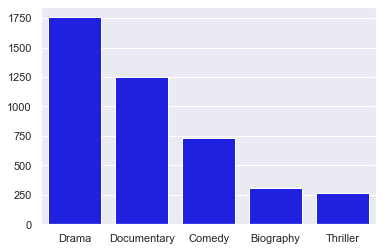

In [97]:
sns.barplot(x=list(top5_g2_genres_dict.keys()), y=list(top5_g2_genres_dict.values()), color='blue')

sum:4318
[0.407 0.29  0.169 0.072 0.061]


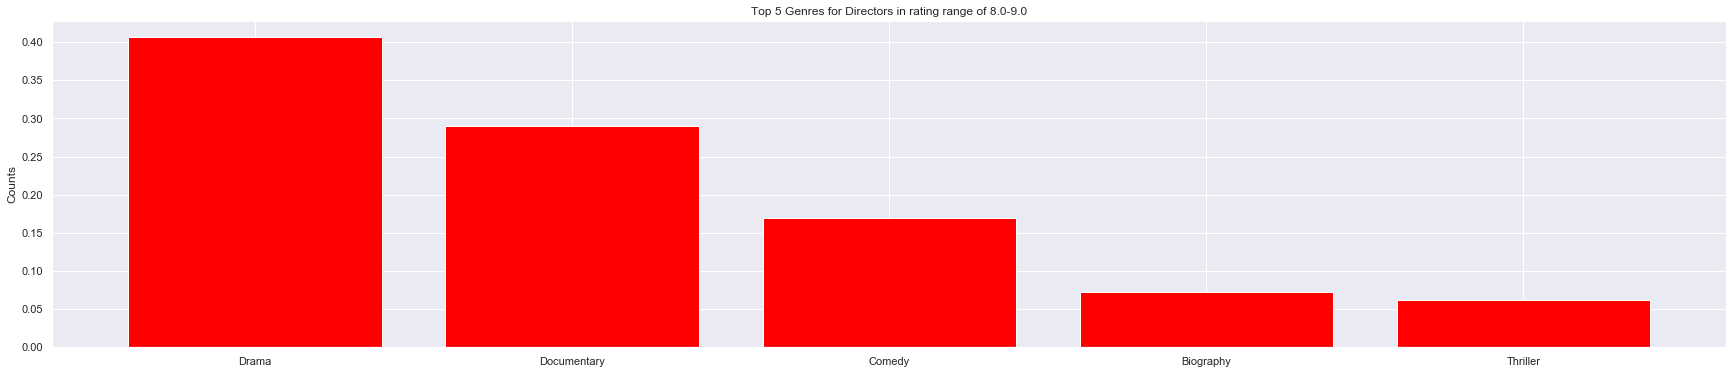

In [98]:
top_5_bar_chart(top5_g2_genres_dict, 'red', 9.0, 8.0, 'Directors', 'Genres')

# Who're Top 100 directors in voted rating range: 8.0-9.0?

In [99]:
q2_gB_directors_dict = cal_director_rate(q2_sortedROI_g2_genres_df, q2_sortedROI_g2_df_cols, 'B')
q2_gB_directors_dict

13
col list is ['nconst', 'primary_profession', 'known_for_titles', 'tconst', 'ordering', 'category', 'primary_title', 'original_title', 'start_year', 'directors', 'averagerating', 'numvotes', 'Drama', 'Romance', 'Thriller', 'Crime', 'History', 'Biography', 'War', 'News', 'Documentary', 'Western', 'Comedy', 'Sport', 'Horror', 'Animation', 'Mystery', 'Action', 'Music', 'Game-Show', 'Short', 'Fantasy', 'Sci-Fi', 'Family', 'Adventure', 'Musical', 'Reality-TV']
genre Crime not weighted in group B !
genre History not weighted in group B !
genre War not weighted in group B !
genre News not weighted in group B !
genre Western not weighted in group B !
genre Sport not weighted in group B !
genre Horror not weighted in group B !
genre Animation not weighted in group B !
genre Mystery not weighted in group B !
genre Action not weighted in group B !
genre Music not weighted in group B !
genre Game-Show not weighted in group B !
genre Short not weighted in group B !
genre Fantasy not weighted in g

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'Larry Rosen': 84,
 'Robin Lough': 45,
 'Martin Scorsese': 45,
 'Mattias Löw': 36,
 'Barry Avrich': 36,
 'Anurag Kashyap': 36,
 'Sonia Anderson': 35,
 'Tim Van Someren': 33,
 'Dan Steadman': 33,
 'Nick Wickham': 30,
 'Christiaan Olwagen': 30,
 'Gonzalo Gonzalez': 30,
 'Vipul Mehta': 27,
 'Christopher Nolan': 27,
 'Szilárd Matusik': 27,
 'Monty Tiwa': 27,
 'Matthew Robinson': 26,
 'A.J. Mattioli': 26,
 'Gregory Monro': 24,
 'James Erskine': 24,
 'Jeremy Herrin': 24,
 'Susan Morgan Cooper': 24,
 'Tjardus Greidanus': 22,
 'Justin Hunt': 22,
 'Roz Owen': 22,
 'Eric Merola': 22,
 'Max Carlson': 22,
 'Giovanni Coda': 22,
 'Paulo César Fajardo': 22,
 'Dragan Bjelogrlic': 22,
 'Ross MacGibbon': 21,
 'Joe L. Roberts': 21,
 'Paul Dugdale': 21,
 'Genc Berisha': 20,
 'Pauli Janhunen Calderón': 20,
 'Kevin Schreck': 20,
 'Jayantha Chandrasiri': 20,
 'Meredith Danluck': 20,
 'Josh Hyde': 20,
 'Yôichi Fujita': 20,
 'Dileesh Pothan': 20,
 'Tigmanshu Dhulia': 20,
 'Marcia Weekes': 18,
 'Tim Hahne': 18

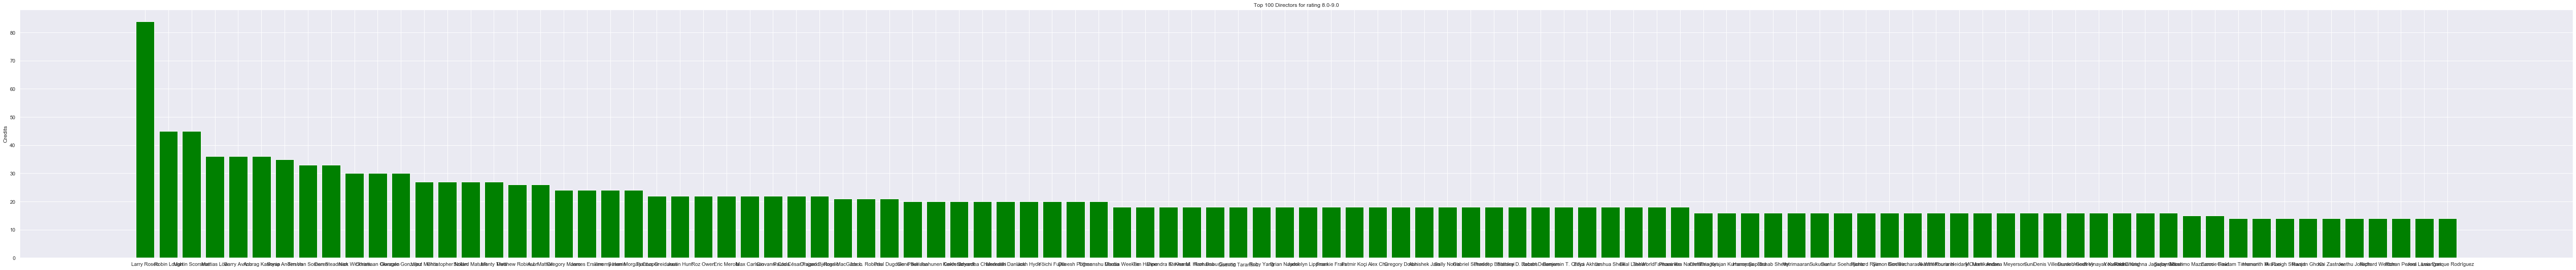

In [100]:
top_100_bar_chart(q2_gB_directors_dict, 'green', 9.0, 8.0, 'Directors')

## Who're Top 100 directors and what're their conducted movies?

In [101]:
q2_gB_directors_movies_dict = get_top_100_director_movie(q2_sortedROI_g2_genres_df, q2_gB_directors_dict)
q2_gB_directors_movies_dict

{'Vipul Mehta': ['Best of Luck Laalu', 'Carry on Kesar', 'Chaal Jeevi Laiye'],
 'Gowtam Tinnanuri': ['Jersey', 'Malli Raava'],
 'Marcia Weekes': ['Barrow: Freedom Fighter', 'Chrissy'],
 'Massimo Mazzucco': ['September 11: The New Pearl Harbor',
  'American Moon',
  'Cancer: The Forbidden Cures'],
 'Tim Hahne': ['24 Hours - One Team. One Target.',
  'Adrenalin: The BMW Touring Car Story',
  'No Limits'],
 'Dipendra K. Khanal': ['Pashupati Prasad', 'Dhanapati'],
 'Tjardus Greidanus': ['Burden of Genius', "The Shot Felt 'Round the World"],
 'Christina Kyi': ['Mudras Calling', 'Deception: Oo Pel Dan Myin'],
 'Hemanth M. Rao': ['Godhi Banna Sadharana Mykattu', 'Kavaludaari'],
 'Ava Leigh Stewart': ['South of Southern', 'Paradise Garden'],
 'Ross MacGibbon': ["Akram Khan's Giselle",
  'Sleeping Beauty: A Gothic Romance',
  'The Railway Children'],
 'Connie Field': ['Have You Heard from Johannesburg: Fair Play',
  'Have You Heard from Johannesburg: The New Generation',
  'Have You Heard from 

## Could we find any match from Top 100 (imdb) to Mike's list (tmdb)?

In [102]:
q2_gB_directors_Mikemovies_dict = match_top_100_director_mikemovie(q2_gB_directors_movies_dict, mike_movies_list)
q2_gB_directors_Mikemovies_dict

{'Vipul Mehta': 0,
 'Gowtam Tinnanuri': 0,
 'Marcia Weekes': 0,
 'Massimo Mazzucco': 0,
 'Tim Hahne': 0,
 'Dipendra K. Khanal': 0,
 'Tjardus Greidanus': 0,
 'Christina Kyi': 0,
 'Hemanth M. Rao': 0,
 'Ava Leigh Stewart': 0,
 'Ross MacGibbon': 0,
 'Connie Field': 0,
 'Ranjan Ghosh': 0,
 'Kai Zastrow': 0,
 'Gregory Monro': 0,
 'Justin Hunt': 0,
 'Steven M. Hirohama': 0,
 'Christopher Nolan': 0,
 'Ram Babu Gurung': 0,
 'Roz Owen': 0,
 'Genc Berisha': 0,
 'Joe L. Roberts': 0,
 'Jeethu Joseph': 0,
 'Larry Rosen': 0,
 'Quentin Tarantino': 0,
 'Richard Weston': 0,
 'Szilárd Matusik': 0,
 'Thiagarajan Kumararaja': 0,
 'Eric Merola': 0,
 'Sonia Anderson': 0,
 'Max Carlson': 0,
 'Hanny Saputra': 0,
 'Rishab Shetty': 0,
 'Mattias Löw': 0,
 'Ruby Yang': 0,
 'Brian Naydol': 0,
 'Vetrimaaran': 0,
 'Rohan Perera': 0,
 'Nick Wickham': 0,
 'James Erskine': 0,
 'Jamielyn Lippman': 0,
 'Tim Van Someren': 0,
 'Dan Steadman': 0,
 'Jeremy Herrin': 0,
 'Pauli Janhunen Calderón': 0,
 'Frankie Frain': 0,
 'Suk

## Could we find any matches from Top 100 (imdb) to tmdb movie set?

In [103]:
q2_gB_directors_tmdbmovies_dict = match_top_100_director_rawmovie(q2_gB_directors_movies_dict, tmdb_movies_df)
q2_gB_directors_tmdbmovies_dict

{'Massimo Mazzucco': ['September 11: The New Pearl Harbor'],
 'Tim Hahne': ['No Limits'],
 'Christopher Nolan': ['Inception', 'Interstellar', 'The Dark Knight Rises'],
 'Joe L. Roberts': ['The Protector'],
 'Jeethu Joseph': ['Drishyam'],
 'Quentin Tarantino': ['Kill Bill: The Whole Bloody Affair',
  'Django Unchained'],
 'Max Carlson': ['Bhopali'],
 'Rishab Shetty': ['Kirik Party'],
 'Jamielyn Lippman': ['When the Bough Breaks: A Documentary About Postpartum Depression'],
 'Tim Van Someren': ['Coriolanus'],
 'Jeremy Herrin': ['The Tempest'],
 'Christiaan Olwagen': ['The Seagull'],
 'Paul Dugdale': ['Harry Styles: Behind the Album'],
 'Joel Lamangan': ['Felix Manalo'],
 'Abhishek Jain': ['Kevi Rite Jaish'],
 'Gabriel Schmidt': ['Revenge'],
 'Robert Delamere': ['Much Ado About Nothing'],
 'Meredith Danluck': ['The Ride'],
 'Dileesh Pothan': ['Maheshinte Prathikaaram'],
 'Susan Morgan Cooper': ['To the Moon and Back'],
 'Denis Villeneuve': ['Incendies', 'Prisoners'],
 'Dragan Bjelogrlic':

In [104]:
q2_gB_directors_tmdbmovies_year_dict = year_count_top_100_director_rawmovie(q2_gB_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gB_directors_tmdbmovies_year_dict

{2010: 4,
 2011: 4,
 2012: 6,
 2013: 5,
 2014: 2,
 2015: 2,
 2016: 5,
 2018: 3,
 2017: 3}

## What're released years for movies conducted by Top 100 directors?
### * info of movie released years relies on tmdb movie data set

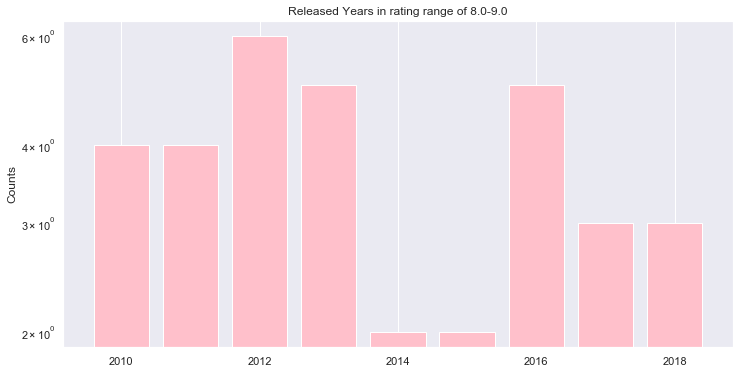

In [181]:
plot_bar_chart(q2_gB_directors_tmdbmovies_year_dict, 'pink', 9.0, 8.0, 'Released Years', 12)

## What's overall average vote for movies conducted by Top 100 directors?
### * info of movie average votes relies on tmdb movie data set

In [182]:
q2_gB_directors_tmdbmovies_vote_dict = vote_top_100_director_rawmovie(q2_gB_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gB_directors_tmdbmovies_vote_dict

{'Christopher Nolan': [8.3, 7.7, 8.2],
 'Martin Scorsese': [8.1, 7.9, 7.9],
 'Meredith Danluck': [9.0, 8.5],
 'Denis Villeneuve': [8.1, 8.0],
 'Quentin Tarantino': [7.9, 8.0],
 'Tim Hahne': [6.0, 8.5],
 'Robert Delamere': [7.2, 6.8],
 'Gabriel Schmidt': [6.4, 6.4],
 'Max Carlson': [10.0],
 'Rishab Shetty': [9.2],
 'Massimo Mazzucco': [8.9],
 'Jamielyn Lippman': [8.5],
 'Paul Dugdale': [8.3],
 'Joel Lamangan': [8.0],
 'Jeethu Joseph': [7.9],
 'Dileesh Pothan': [7.7],
 'Tigmanshu Dhulia': [7.5],
 'Abhishek Jain': [7.5],
 'Dragan Bjelogrlic': [7.0],
 'Tim Van Someren': [6.0],
 'Jeremy Herrin': [5.8],
 'Christiaan Olwagen': [5.8],
 'Joe L. Roberts': [5.1],
 'Susan Morgan Cooper': [5.0]}

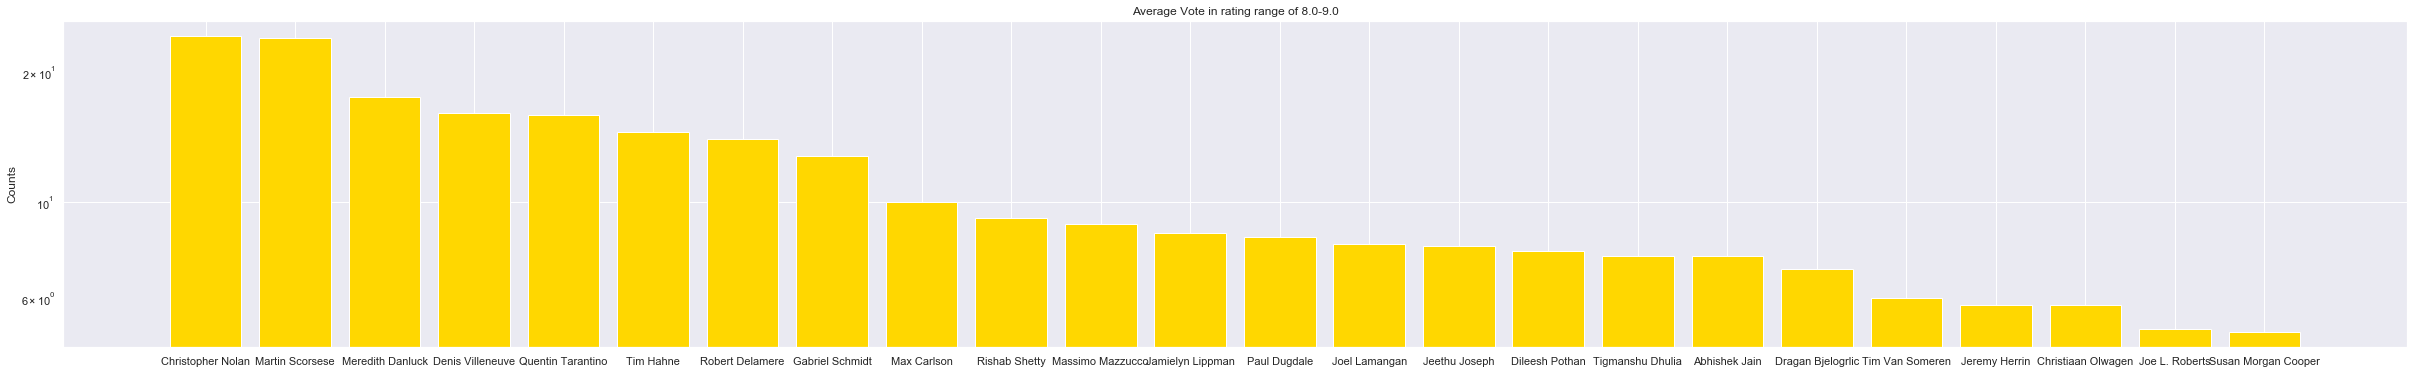

In [183]:
plot_bar_chart(q2_gB_directors_tmdbmovies_vote_dict, 'gold', 9.0, 8.0, 'Average Vote', 42)

## How popular are movies conducted by Top 100 directors?
### * info of movie popularity relies on tmdb movie data set

In [185]:
q2_gB_directors_tmdbmovies_popularity_dict = pop_top_100_director_rawmovie(q2_gB_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gB_directors_tmdbmovies_popularity_dict

{'Christopher Nolan': [27.92, 26.22, 28.44],
 'Martin Scorsese': [18.06, 8.59, 29.518],
 'Quentin Tarantino': [14.173, 21.26],
 'Gabriel Schmidt': [11.795, 11.795],
 'Denis Villeneuve': [8.973, 14.358],
 'Tim Van Someren': [8.016],
 'Christiaan Olwagen': [7.287],
 'Robert Delamere': [5.952, 1.213],
 'Jeremy Herrin': [6.3],
 'Jeethu Joseph': [5.754],
 'Paul Dugdale': [4.049],
 'Tigmanshu Dhulia': [3.605],
 'Dileesh Pothan': [2.72],
 'Dragan Bjelogrlic': [2.473],
 'Rishab Shetty': [1.713],
 'Tim Hahne': [0.627, 0.6],
 'Meredith Danluck': [0.6, 0.6],
 'Joe L. Roberts': [0.84],
 'Massimo Mazzucco': [0.717],
 'Joel Lamangan': [0.666],
 'Max Carlson': [0.6],
 'Abhishek Jain': [0.6],
 'Susan Morgan Cooper': [0.6],
 'Jamielyn Lippman': [0.6]}

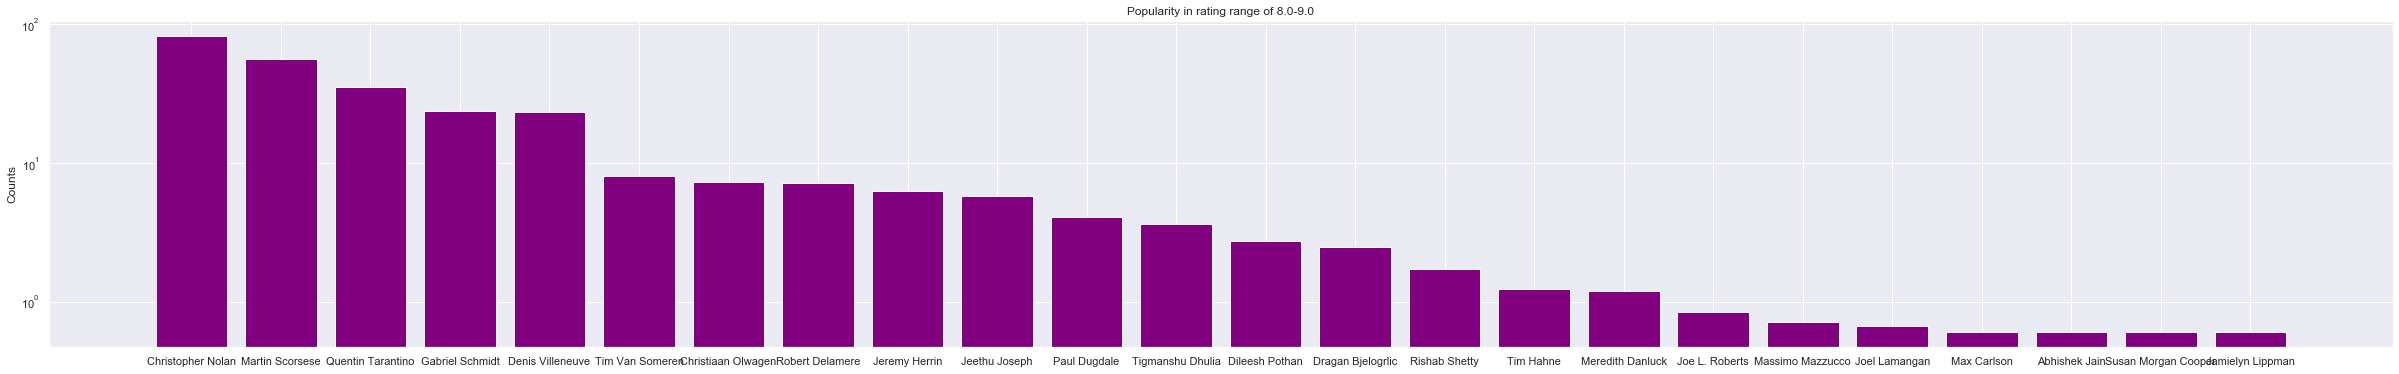

In [186]:
plot_bar_chart(q2_gB_directors_tmdbmovies_popularity_dict, 'purple', 9.0, 8.0, 'Popularity', 42)

## What're primary professions for Top 100 directors?
### * info of director primary profession relies on tmdb movie data set

In [110]:
q2_gB_directors_prof_dict = cal_top_100_director_prof(q2_sortedROI_g2_df, 'primary_profession')
q2_gB_directors_prof_dict

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


{'director': 3251,
 'writer': 2279,
 'producer': 1804,
 'editor': 753,
 'actor': 578,
 'cinematographer': 475,
 'camera_department': 227,
 'miscellaneous': 204,
 'assistant_director': 177,
 'actress': 72,
 'sound_department': 68}

sum:9888
[0.329 0.23  0.182 0.076 0.058 0.048 0.023 0.021 0.018 0.007 0.007]


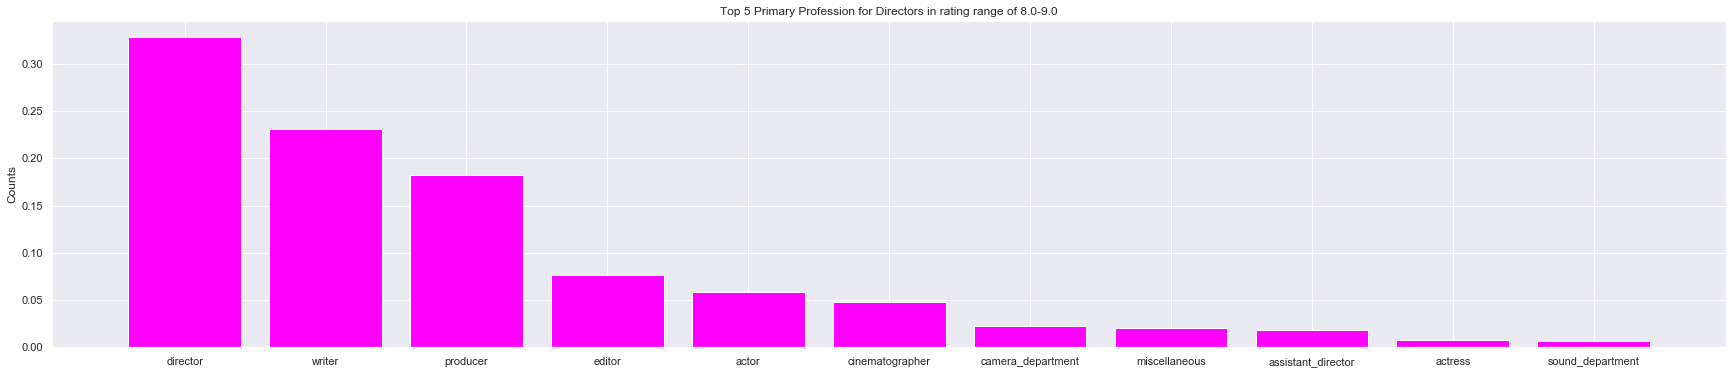

In [111]:
top_5_bar_chart(q2_gB_directors_prof_dict, 'magenta', 9.0, 8.0, 'Directors', 'Primary Profession')

## What's correlation btw vote & popuarity over genres for Top 100 directors?
### * info of vote, popularity, genre relies on tmdb movie data set

In [112]:
q2_gB_directors_tmdbmovies_df = cor_top_100_director_popVSvote(q2_gB_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gB_directors_tmdbmovies_df.head(10)

,vote,popular,vote_doc,popular_doc,vote_dra,popular_dra,vote_com,popular_com,vote_rom,popular_rom,vote_thr,popular_thr,vote_his,popular_his
0,8.3,27.920,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,8.1,18.060,0.0,0.00,8.1,18.060,0.0,0.0,0.0,0.0,8.1,18.06,0.0,0.0
2,8.1,8.973,0.0,0.00,8.1,8.973,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,5.8,6.300,0.0,0.00,5.8,6.300,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,7.9,14.173,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
5,7.9,8.590,7.9,8.59,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
6,5.1,0.840,0.0,0.00,5.1,0.840,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
7,10.0,0.600,10.0,0.60,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00,10.0,0.6
8,7.7,26.220,0.0,0.00,7.7,26.220,0.0,0.0,0.0,0.0,7.7,26.22,0.0,0.0
9,8.0,21.260,0.0,0.00,8.0,21.260,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


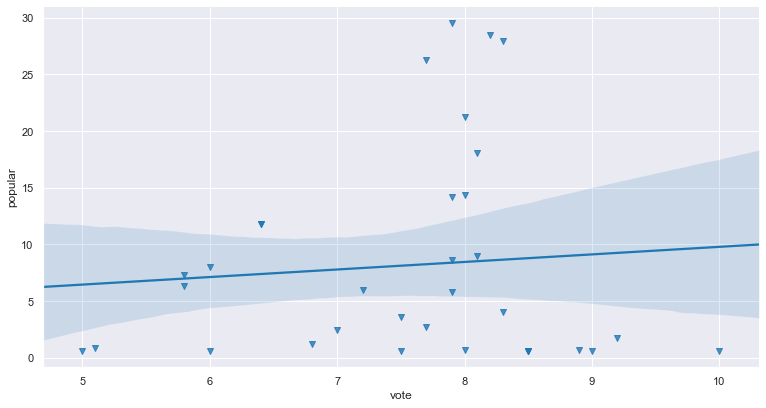

In [113]:
plot_reg(q2_gB_directors_tmdbmovies_df, 'vote', 'popular')

# Conclusion:

## * Director's primary profession is irrelevant to movie genres
## * More popular movies tend to attract more votes

# * Group 3: rating range from 7.0 to 8.0

In [114]:
q2_sortedROI_g3_genres_df = gen_genre_cols(q2_sortedROI_g3_df, 'genres')
print(q2_sortedROI_g3_genres_df.shape)
q2_sortedROI_g3_genres_df.head()

(9534, 36)


C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,...,Animation,Mystery,Action,Music,Fantasy,Sci-Fi,Family,Adventure,Musical,Reality-TV
primary_name,,,,,,,,,,,,,,,,,,,,,
Gajendra Ahire,nm2243359,"director,writer,editor","tt5904818,tt7734662,tt2511530,tt0833441",tt7734662,5,director,Pimpal,Pimpal,2017,[Drama],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mike Lombardo,nm3105152,"producer,director,writer","tt7288442,tt7280724,tt7280730,tt3990380",tt7288442,5,director,I'm Dreaming of a White Doomsday,I'm Dreaming of a White Doomsday,2017,"[Drama, Horror]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ranji Vijayan,nm6933212,"director,actor,writer","tt4668824,tt8308034,tt4222112",tt8308034,5,director,Swapnarajyam,Swapnarajyam,2019,"[Comedy, Drama, Romance]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Batbayar Chogsom,nm7676629,"director,writer,producer","tt5139492,tt8310282",tt8310282,5,director,Out of Paradise,Out of Paradise,2018,[Drama],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Victor Cubillos,nm3839359,"writer,producer,director","tt2070882,tt4621594,tt5117638,tt1521679",tt1521679,5,director,April 31st,April 31st,2010,"[Biography, Documentary, Drama]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
q2_sortedROI_g3_genres_df = fill_genre_type(q2_sortedROI_g3_genres_df, 'genres')
print(q2_sortedROI_g3_genres_df.shape)
q2_sortedROI_g3_genres_df.head()

(9534, 36)


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,...,Animation,Mystery,Action,Music,Fantasy,Sci-Fi,Family,Adventure,Musical,Reality-TV
primary_name,,,,,,,,,,,,,,,,,,,,,
Gajendra Ahire,nm2243359,"director,writer,editor","tt5904818,tt7734662,tt2511530,tt0833441",tt7734662,5,director,Pimpal,Pimpal,2017,[Drama],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mike Lombardo,nm3105152,"producer,director,writer","tt7288442,tt7280724,tt7280730,tt3990380",tt7288442,5,director,I'm Dreaming of a White Doomsday,I'm Dreaming of a White Doomsday,2017,"[Drama, Horror]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ranji Vijayan,nm6933212,"director,actor,writer","tt4668824,tt8308034,tt4222112",tt8308034,5,director,Swapnarajyam,Swapnarajyam,2019,"[Comedy, Drama, Romance]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Batbayar Chogsom,nm7676629,"director,writer,producer","tt5139492,tt8310282",tt8310282,5,director,Out of Paradise,Out of Paradise,2018,[Drama],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Victor Cubillos,nm3839359,"writer,producer,director","tt2070882,tt4621594,tt5117638,tt1521679",tt1521679,5,director,April 31st,April 31st,2010,"[Biography, Documentary, Drama]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
q2_sortedROI_g3_genres_df.drop('genres', axis=1, inplace=True)

In [117]:
q2_g3_genres_dict = cal_genre_type(q2_sortedROI_g3_genres_df, q2_sortedROI_g3_df_cols)
q2_g3_genres_dict

col list is ['nconst', 'primary_profession', 'known_for_titles', 'tconst', 'ordering', 'category', 'primary_title', 'original_title', 'start_year', 'directors', 'averagerating', 'numvotes', 'Drama', 'Romance', 'Thriller', 'Crime', 'History', 'Biography', 'War', 'News', 'Documentary', 'Western', 'Comedy', 'Sport', 'Horror', 'Animation', 'Mystery', 'Action', 'Music', 'Fantasy', 'Sci-Fi', 'Family', 'Adventure', 'Musical', 'Reality-TV']


{'Drama': 5395,
 'Romance': 1231,
 'Thriller': 1083,
 'Crime': 819,
 'History': 658,
 'Biography': 935,
 'War': 171,
 'News': 82,
 'Documentary': 2469,
 'Western': 30,
 'Comedy': 2312,
 'Sport': 276,
 'Horror': 421,
 'Animation': 264,
 'Mystery': 430,
 'Action': 1054,
 'Music': 493,
 'Fantasy': 307,
 'Sci-Fi': 252,
 'Family': 554,
 'Adventure': 589,
 'Musical': 173,
 'Reality-TV': 1}

#### Top 5 genres of movies in rating range 7.0 - 8.0

In [118]:
top5_g3_genres = sorted(q2_g3_genres_dict, key=q2_g3_genres_dict.get, reverse=True)[:5]
top5_g3_genres

['Drama', 'Documentary', 'Comedy', 'Romance', 'Thriller']

In [119]:
top5_g3_genres_dict = {k:v for k,v in sorted(q2_g3_genres_dict.items(), key=lambda x:x[1], reverse=True)[:5]}
top5_g3_genres_dict

{'Drama': 5395,
 'Documentary': 2469,
 'Comedy': 2312,
 'Romance': 1231,
 'Thriller': 1083}

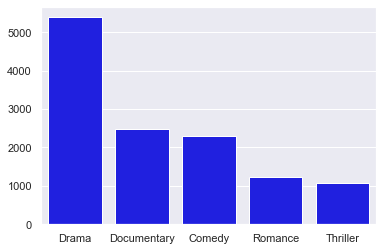

In [120]:
sns.barplot(x=list(top5_g3_genres_dict.keys()), y=list(top5_g3_genres_dict.values()), color='blue')

sum:12490
[0.432 0.198 0.185 0.099 0.087]


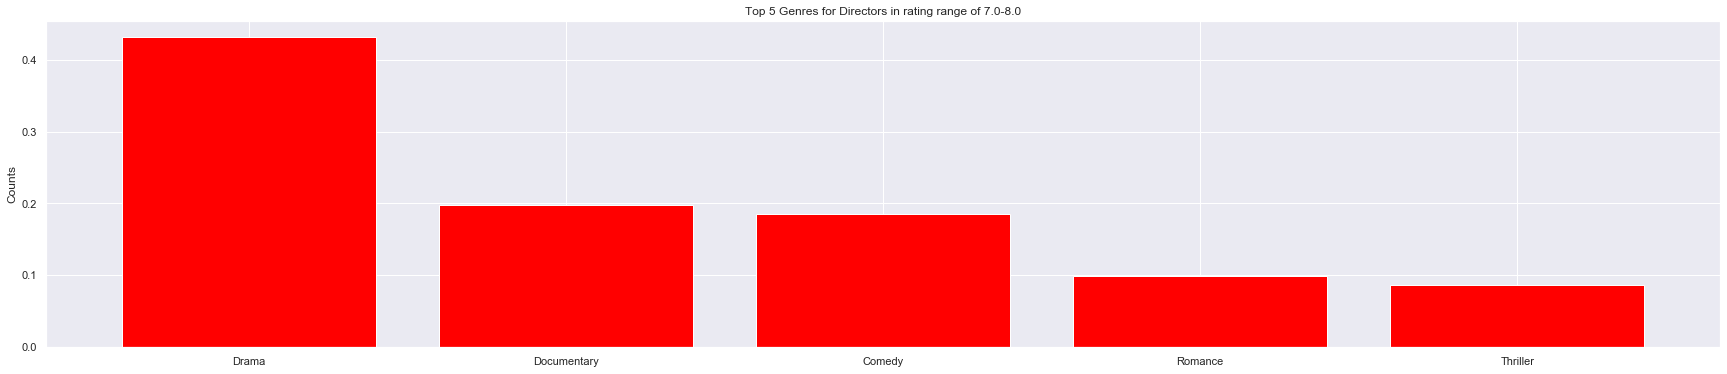

In [121]:
top_5_bar_chart(top5_g3_genres_dict, 'red', 8.0, 7.0, 'Directors', 'Genres')

# Who are Top 100 directors in voted rating range: 7.0-8.0?

In [122]:
q2_gC_directors_dict = cal_director_rate(q2_sortedROI_g3_genres_df, q2_sortedROI_g3_df_cols, 'C')
q2_gC_directors_dict

13
col list is ['nconst', 'primary_profession', 'known_for_titles', 'tconst', 'ordering', 'category', 'primary_title', 'original_title', 'start_year', 'directors', 'averagerating', 'numvotes', 'Drama', 'Romance', 'Thriller', 'Crime', 'History', 'Biography', 'War', 'News', 'Documentary', 'Western', 'Comedy', 'Sport', 'Horror', 'Animation', 'Mystery', 'Action', 'Music', 'Fantasy', 'Sci-Fi', 'Family', 'Adventure', 'Musical', 'Reality-TV']
genre Crime not weighted in group C !
genre History not weighted in group C !
genre War not weighted in group C !
genre News not weighted in group C !
genre Western not weighted in group C !
genre Sport not weighted in group C !
genre Horror not weighted in group C !
genre Animation not weighted in group C !
genre Mystery not weighted in group C !
genre Action not weighted in group C !
genre Music not weighted in group C !
genre Fantasy not weighted in group C !
genre Sci-Fi not weighted in group C !
genre Family not weighted in group C !
genre Adventure

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'Srijit Mukherji': 112,
 'Takahiro Miki': 96,
 'Barry Avrich': 90,
 'Yoshihiro Nakamura': 90,
 'Cathy Garcia-Molina': 84,
 'Angga Dwimas Sasongko': 84,
 'Lav Diaz': 80,
 'Steven Spielberg': 78,
 'Michael Fredianelli': 75,
 'Jerrold Tarog': 68,
 'Larry Rosen': 65,
 'Jason Paul Laxamana': 65,
 'Ody C. Harahap': 65,
 'Hanung Bramantyo': 63,
 'Alex Gibney': 63,
 'Ashok Pati': 60,
 'Vikram K. Kumar': 60,
 'David Horn': 60,
 'Nawapol Thamrongrattanarit': 56,
 'Navaniat Singh': 56,
 'Hirokazu Koreeda': 55,
 'Çagan Irmak': 52,
 'Shoojit Sircar': 52,
 'Abhishek Chaubey': 52,
 'Anurag Singh': 52,
 'Donatas Ulvydas': 52,
 'Ifa Isfansyah': 52,
 'Rizal Mantovani': 50,
 'Suseenthiran': 50,
 'Somnath Sen': 48,
 'Antoinette Jadaone': 48,
 'Yograj Bhat': 48,
 'Marcus H. Rosenmüller': 48,
 'James Wan': 48,
 'Gautham Menon': 45,
 'Ksshitij Chaudhary': 45,
 'Trivikram Srinivas': 44,
 'Dan Villegas': 44,
 'Sameer Vidwans': 44,
 'Stephan Taubert': 44,
 'Norihiro Koizumi': 44,
 'Alejandro G. Iñárritu': 42,


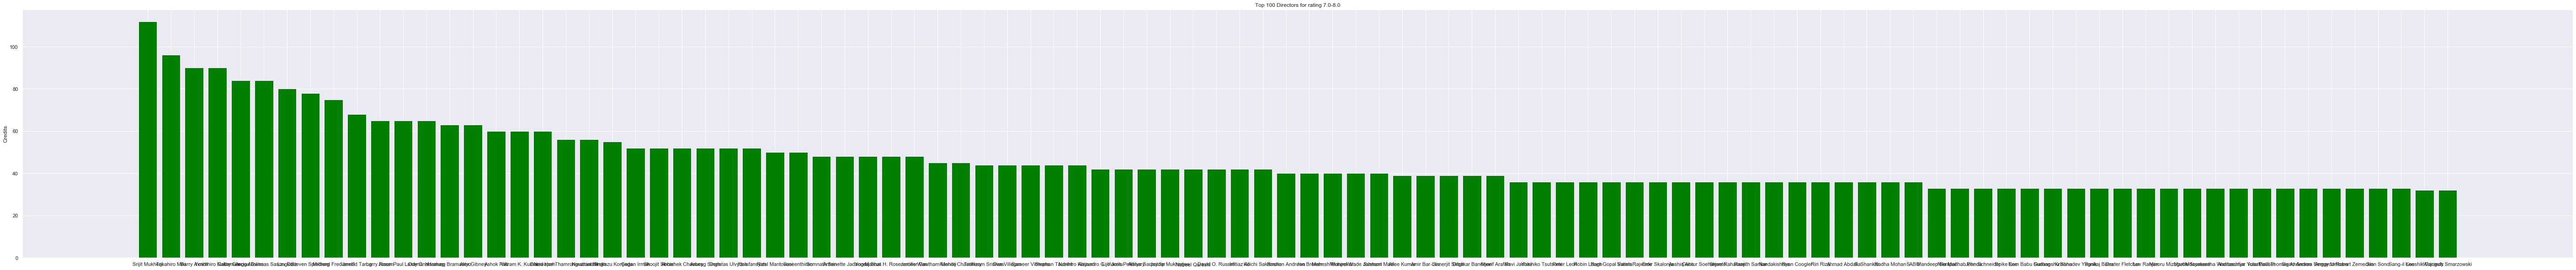

In [123]:
top_100_bar_chart(q2_gC_directors_dict, 'green', 8.0, 7.0, 'Directors')

## Who are Top 100 directors and what're their conducted movies?

In [124]:
q2_gC_directors_movies_dict = get_top_100_director_movie(q2_sortedROI_g3_genres_df, q2_gC_directors_dict)
q2_gC_directors_movies_dict

{'Ravi Jadhav': ['Nude: Chitraa',
  'Time Pass',
  'Sound of Heaven: The Story of Balgandharva'],
 'Alejandro G. Iñárritu': ['The Revenant',
  'Birdman or (The Unexpected Virtue of Ignorance)',
  'Biutiful'],
 'Jerrold Tarog': ['Senior Year', 'Bliss', 'Heneral Luna', 'Sana Dati'],
 'Yukihiko Tsutsumi': ['My House',
  'Initiation Love',
  'Beck',
  'Eight Ranger 2'],
 'Srijit Mukherji': ['Jaatishwar',
  'Uma',
  'Vinci Da',
  'Autograph',
  'Hemlock Society',
  'Rajkahini',
  'Ek Je Chhilo Raja'],
 'Lijo Jose Pellissery': ['Angamaly Diaries', 'Amen', 'City of God'],
 'Aditya Sarpotdar': ['The Sholay Girl', 'Narbachi Wadi', 'Classmates'],
 'Peter Leon': ['LA Underground', 'Copper Creek', 'Darklands'],
 'Trivikram Srinivas': ['Aravindha Sametha Veera Raghava',
  'Khaleja',
  'Atharintiki Daaredi',
  'Wanderer (I)'],
 'Mandeep Benipal': ['Dakuaan Da Munda', 'Sadda Haq', 'Ekam: Son of Soil'],
 'Robin Lough': ["Royal Shakespeare Company: Love's Labour's Won",
  'National Theatre Live: King L

## Could we find any match from Top 100 list (imdb) to Mike's list (tmdb)?

In [125]:
q2_gC_directors_Mikemovies_dict = match_top_100_director_mikemovie(q2_gC_directors_movies_dict, mike_movies_list)
q2_gC_directors_Mikemovies_dict

{'Ravi Jadhav': 0,
 'Alejandro G. Iñárritu': 0,
 'Jerrold Tarog': 0,
 'Yukihiko Tsutsumi': 0,
 'Srijit Mukherji': 0,
 'Lijo Jose Pellissery': 0,
 'Aditya Sarpotdar': 0,
 'Peter Leon': 0,
 'Trivikram Srinivas': 0,
 'Mandeep Benipal': 0,
 'Robin Lough': 0,
 'Cathy Garcia-Molina': 0,
 'Roshan Andrews': 0,
 'Çagan Irmak': 0,
 'Somnath Sen': 0,
 'Atlee Kumar': 0,
 'Joydip Mukherjee': 0,
 'Nila Madhab Panda': 0,
 'Hanung Bramantyo': 0,
 'Hirokazu Koreeda': 0,
 'Larry Rosen': 0,
 'John Schneider': 0,
 'Alex Gibney': 0,
 'Ashok Pati': 0,
 'Vikram K. Kumar': 0,
 'Gautham Menon': 0,
 'Ram Gopal Varma': 0,
 'Spike Lee': 0,
 'Jon Brewer': 0,
 'Kaushik Ganguly': 0,
 'Dan Villegas': 0,
 'Satish Rajwade': 0,
 'Ram Babu Gurung': 0,
 'Emir Skalonja': 0,
 'Barry Avrich': 0,
 'Mahesh Manjrekar': 0,
 'Ksshitij Chaudhary': 0,
 'Sudhanshu Sahu': 0,
 'Nawapol Thamrongrattanarit': 0,
 'Aashiq Abu': 0,
 'Guntur Soeharjanto': 0,
 'David Horn': 0,
 'Shoojit Sircar': 0,
 'Steve Rahaman': 0,
 'Jason Paul Laxamana'

## Could we find any matches from Top 100 list (imdb) to tmdb movie set?

In [126]:
q2_gC_directors_tmdbmovies_dict = match_top_100_director_rawmovie(q2_gC_directors_movies_dict, tmdb_movies_df)
q2_gC_directors_tmdbmovies_dict

{'Alejandro G. Iñárritu': ['The Revenant', 'Biutiful'],
 'Jerrold Tarog': ['Heneral Luna'],
 'Srijit Mukherji': ['Jaatishwar'],
 'Hanung Bramantyo': ['The Gift'],
 'Hirokazu Koreeda': ['Shoplifters',
  'Like Father, Like Son',
  'Our Little Sister',
  'I Wish'],
 'John Schneider': ['Anderson Bench'],
 'Alex Gibney': ['Catching Hell',
  'Zero Days',
  'The Armstrong Lie',
  'The Last Gladiators',
  'Casino Jack and the United States of Money'],
 'Vikram K. Kumar': ['Hello'],
 'Gautham Menon': ['Ye Maaya Chesave'],
 'Spike Lee': ['Bad 25',
  'BlacKkKlansman',
  "Michael Jackson's Journey from Motown to Off the Wall"],
 'Jon Brewer': ['B.B. King: The Life of Riley'],
 'Emir Skalonja': ['Flesh of My Flesh'],
 'Ksshitij Chaudhary': ['Vekh Baraatan Challiyan'],
 'Aashiq Abu': ['Mayaanadhi'],
 'David Horn': ['The Woodsman'],
 'Shoojit Sircar': ['Vicky Donor', 'Madras Cafe', 'October'],
 'Lav Diaz': ['Norte, the End of History', 'Florentina Hubaldo, CTE'],
 'Amir Bar-Lev': ['The Tillman Story'

In [127]:
q2_gC_directors_tmdbmovies_year_dict = year_count_top_100_director_rawmovie(q2_gC_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gC_directors_tmdbmovies_year_dict

{2010: 15,
 2011: 8,
 2012: 15,
 2013: 9,
 2014: 11,
 2015: 16,
 2016: 14,
 2017: 6,
 2018: 6}

## What're released years for movies conducted by Top 100 directors?
### * info of movie released years relies on tmdb movie data set

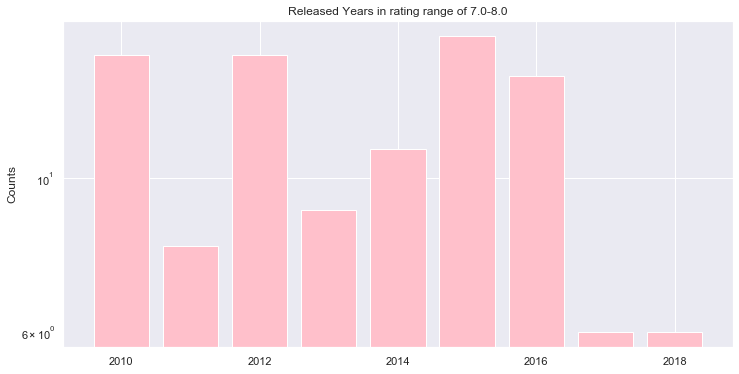

In [187]:
plot_bar_chart(q2_gC_directors_tmdbmovies_year_dict, 'pink', 8.0, 7.0, 'Released Years', 12)

## What's overall average vote for movies conducted by Top 100 directors?
### * info of movie average votes relies on tmdb movie data set

In [188]:
q2_gC_directors_tmdbmovies_vote_dict = vote_top_100_director_rawmovie(q2_gC_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gC_directors_tmdbmovies_vote_dict

{'Steven Spielberg': [6.8, 7.2, 6.8, 7.2, 7.2, 7.0, 7.6, 7.0],
 'Hirokazu Koreeda': [7.2, 7.5, 7.5, 7.5, 8.0],
 'Hanung Bramantyo': [6.6, 9.0, 5.8, 6.7, 9.0],
 'Alex Gibney': [7.2, 6.6, 6.4, 7.0, 7.5],
 'Ryan Coogler': [5.1, 7.4, 7.3, 7.3, 7.4],
 'Paul Thomas Anderson': [7.1, 7.5, 4.0, 7.2, 7.2],
 'James Wan': [7.5, 7.3, 7.2, 6.8],
 'David O. Russell': [7.3, 7.1, 6.8, 6.8],
 'Martin Scorsese': [6.6, 7.1, 7.1, 7.1],
 'Robert Zemeckis': [6.7, 6.9, 6.7, 6.7],
 'Alejandro G. Iñárritu': [7.2, 7.4, 7.4],
 'Spike Lee': [7.1, 7.3, 7.6],
 'Shoojit Sircar': [6.5, 7.0, 6.9],
 'Sang-il Lee': [4.3, 5.9, 5.2],
 'Lav Diaz': [7.9, 7.4],
 'Amir Bar-Lev': [7.5, 6.7],
 'Sion Sono': [6.6, 7.4],
 'Dexter Fletcher': [6.8, 7.2],
 'Abhishek Chaubey': [6.4, 7.2],
 'Sharif Arafah': [6.6, 6.6],
 'Dibakar Banerjee': [6.1, 6.9],
 'Michael Fredianelli': [6.0, 4.0],
 'Imtiaz Ali': [2.7, 7.1],
 'Jerrold Tarog': [8.0],
 'Nabeel Qureshi': [7.9],
 'Aashiq Abu': [7.9],
 'Jon Brewer': [7.7],
 'Pankaj Batra': [7.7],
 'Anur

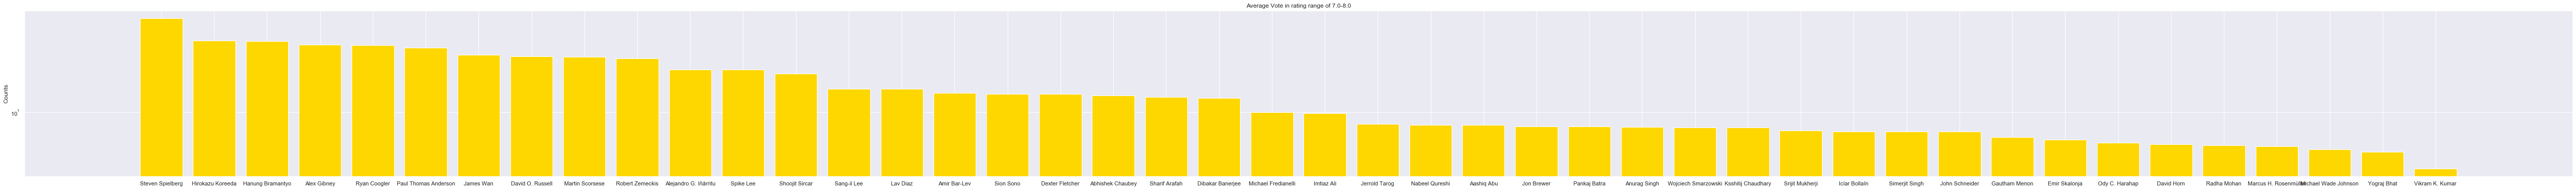

In [189]:
plot_bar_chart(q2_gC_directors_tmdbmovies_vote_dict, 'gold', 8.0, 7.0, 'Average Vote', 90)

## How popular are movies conducted by Top 100 directors?
### * info of movie popularity relies on tmdb movie data set

In [190]:
q2_gC_directors_tmdbmovies_popularity_dict = pop_top_100_director_rawmovie(q2_gC_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gC_directors_tmdbmovies_popularity_dict

{'Steven Spielberg': [11.981,
  10.378,
  12.693,
  12.836,
  12.836,
  15.551,
  30.029,
  15.551],
 'James Wan': [18.886, 20.396, 19.058, 38.102],
 'Ryan Coogler': [2.058, 9.587, 16.356, 16.356, 44.14],
 'Robert Zemeckis': [11.692, 11.754, 19.611, 19.611],
 'Hirokazu Koreeda': [6.138, 7.902, 10.151, 10.151, 17.361],
 'David O. Russell': [10.395, 15.351, 12.481, 12.481],
 'Alejandro G. Iñárritu': [7.697, 19.41, 19.41],
 'Paul Thomas Anderson': [12.829, 1.249, 0.6, 15.269, 15.269],
 'Martin Scorsese': [1.419, 12.936, 10.617, 10.617],
 'Spike Lee': [1.821, 3.388, 25.101],
 'Dexter Fletcher': [5.948, 11.483],
 'Sion Sono': [8.582, 7.5],
 'Hanung Bramantyo': [1.304, 0.624, 0.6, 12.097, 0.631],
 'Alex Gibney': [1.428, 1.924, 1.387, 3.01, 6.689],
 'Sang-il Lee': [1.122, 1.869, 10.003],
 'Shoojit Sircar': [2.248, 5.064, 3.103],
 'Abhishek Chaubey': [4.48, 5.305],
 'Dibakar Banerjee': [6.824, 2.522],
 'Imtiaz Ali': [2.409, 5.936],
 'Ody C. Harahap': [7.48],
 'Icíar Bollaín': [7.286],
 'Aashiq

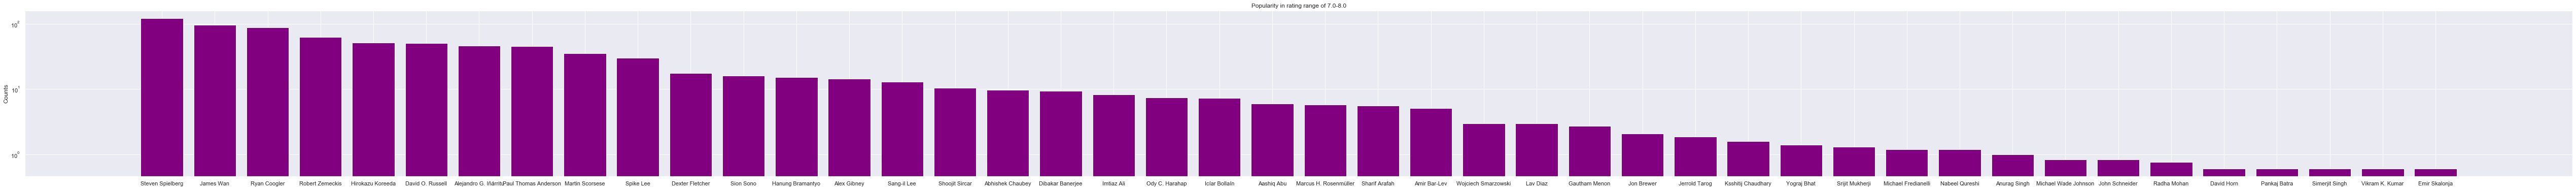

In [191]:
plot_bar_chart(q2_gC_directors_tmdbmovies_popularity_dict, 'purple', 8.0, 7.0, 'Popularity', 90)

## What're primary professions for Top 100 directors?
### * info of director primary profession relies on tmdb movie data set

In [133]:
q2_gC_directors_prof_dict = cal_top_100_director_prof(q2_sortedROI_g3_df, 'primary_profession')
q2_gC_directors_prof_dict

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


{'director': 8859,
 'writer': 6709,
 'producer': 4551,
 'actor': 1674,
 'editor': 1530,
 'cinematographer': 923,
 'assistant_director': 675,
 'miscellaneous': 511,
 'camera_department': 434,
 'actress': 220,
 'art_department': 161}

sum:26247
[0.338 0.256 0.173 0.064 0.058 0.035 0.026 0.019 0.017 0.008 0.006]


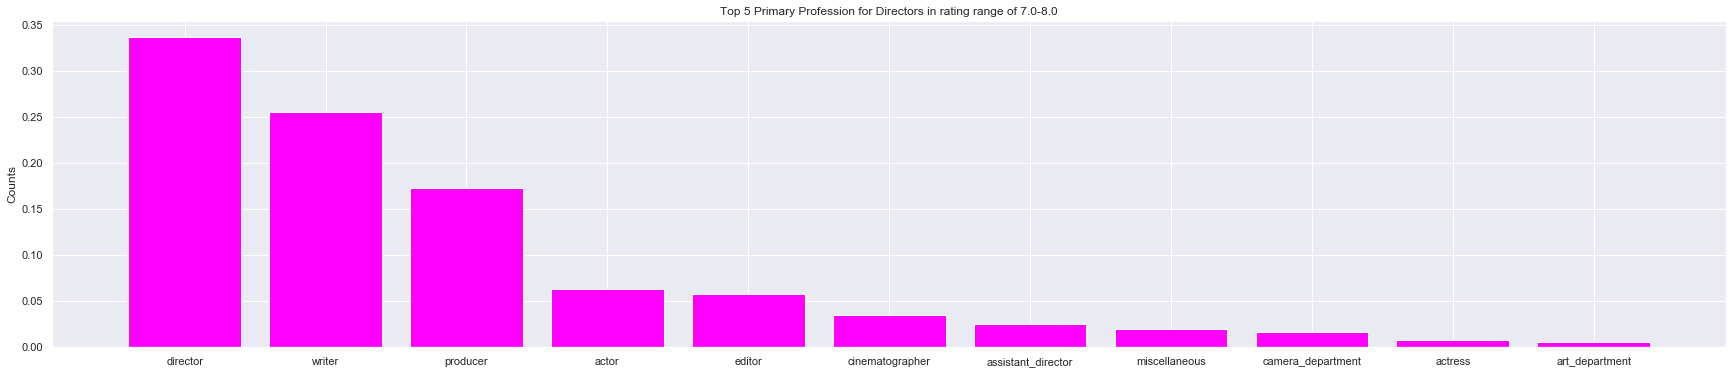

In [134]:
top_5_bar_chart(q2_gC_directors_prof_dict, 'magenta', 8.0, 7.0, 'Directors', 'Primary Profession')

## What's correlation btw vote & popuarity over genres for Top 100 directors?
### * info of vote, popularity, genre relies on tmdb movie data set

In [135]:
q2_gC_directors_tmdbmovies_df = cor_top_100_director_popVSvote(q2_gC_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gC_directors_tmdbmovies_df.head(10)

,vote,popular,vote_doc,popular_doc,vote_dra,popular_dra,vote_com,popular_com,vote_rom,popular_rom,vote_thr,popular_thr,vote_his,popular_his
0,7.3,10.395,0.0,0.000,7.3,10.395,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0
1,6.6,8.582,0.0,0.000,6.6,8.582,0.0,0.00,0.0,0.000,6.6,8.582,0.0,0.0
2,7.2,7.697,0.0,0.000,7.2,7.697,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0
3,6.1,6.824,0.0,0.000,6.1,6.824,0.0,0.00,6.1,6.824,0.0,0.000,0.0,0.0
4,5.3,5.779,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.000,5.3,5.779,0.0,0.0
5,6.4,4.480,0.0,0.000,0.0,0.000,6.4,4.48,0.0,0.000,6.4,4.480,0.0,0.0
6,7.5,2.813,7.5,2.813,0.0,0.000,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0
7,6.3,2.726,0.0,0.000,6.3,2.726,0.0,0.00,6.3,2.726,0.0,0.000,0.0,0.0
8,6.5,2.248,0.0,0.000,6.5,2.248,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0
9,7.2,1.428,7.2,1.428,0.0,0.000,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0


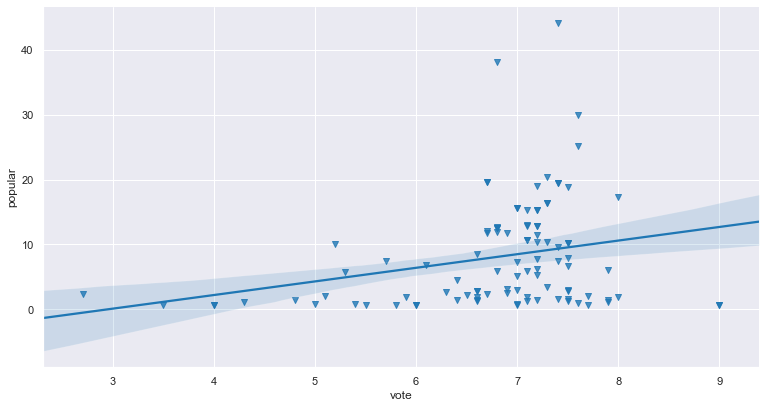

In [136]:
plot_reg(q2_gC_directors_tmdbmovies_df, 'vote', 'popular')

# Conclusion:

## * Director's primary profession is irrelevant to movie genres
## * More popular movies tend to attract more votes

# * Group 4: rating range from 6.0 to 7.0

In [137]:
q2_sortedROI_g4_genres_df = gen_genre_cols(q2_sortedROI_g4_df, 'genres')
print(q2_sortedROI_g4_genres_df.shape)
q2_sortedROI_g4_genres_df.head()

(14809, 36)


C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,...,Animation,Mystery,Action,Music,Fantasy,Sci-Fi,Family,Adventure,Musical,Reality-TV
primary_name,,,,,,,,,,,,,,,,,,,,,
David Campion,nm3364270,"writer,director,producer","tt4851658,tt1394360,tt2578066,tt6475736",tt2578066,5,director,Woodfalls,Woodfalls,2014,[Drama],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Javier Mujica,nm1137409,"assistant_director,director,writer","tt0291403,tt5627990,tt0111071,tt3704074",tt3704074,5,director,The 86,The 86,2017,"[Action, Biography, Crime]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kathryn Lee Moss,nm5164020,"director,writer","tt3763398,tt2274538",tt2274538,5,director,Resistance Movement,Resistance Movement,2013,"[Drama, History, War]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kane Guglielmi,nm2287669,"director,producer,editor","tt0094481,tt1387151,tt4937112",tt4937112,5,director,Cooped Up,Cooped Up,2016,"[Comedy, Drama, Romance]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alexis Durand-Brault,nm0105680,"director,cinematographer,assistant_director","tt1132285,tt0400400,tt6541904,tt9573292",tt3025410,5,director,The Little Queen,La petite reine,2014,"[Biography, Drama, Sport]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
q2_sortedROI_g4_genres_df = fill_genre_type(q2_sortedROI_g4_genres_df, 'genres')
print(q2_sortedROI_g4_genres_df.shape)
q2_sortedROI_g4_genres_df.head()

(14809, 36)


,nconst,primary_profession,known_for_titles,tconst,ordering,category,primary_title,original_title,start_year,genres,...,Animation,Mystery,Action,Music,Fantasy,Sci-Fi,Family,Adventure,Musical,Reality-TV
primary_name,,,,,,,,,,,,,,,,,,,,,
David Campion,nm3364270,"writer,director,producer","tt4851658,tt1394360,tt2578066,tt6475736",tt2578066,5,director,Woodfalls,Woodfalls,2014,[Drama],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Javier Mujica,nm1137409,"assistant_director,director,writer","tt0291403,tt5627990,tt0111071,tt3704074",tt3704074,5,director,The 86,The 86,2017,"[Action, Biography, Crime]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kathryn Lee Moss,nm5164020,"director,writer","tt3763398,tt2274538",tt2274538,5,director,Resistance Movement,Resistance Movement,2013,"[Drama, History, War]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kane Guglielmi,nm2287669,"director,producer,editor","tt0094481,tt1387151,tt4937112",tt4937112,5,director,Cooped Up,Cooped Up,2016,"[Comedy, Drama, Romance]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alexis Durand-Brault,nm0105680,"director,cinematographer,assistant_director","tt1132285,tt0400400,tt6541904,tt9573292",tt3025410,5,director,The Little Queen,La petite reine,2014,"[Biography, Drama, Sport]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
q2_sortedROI_g4_genres_df.drop('genres', axis=1, inplace=True)

In [140]:
q2_g4_genres_dict = cal_genre_type(q2_sortedROI_g4_genres_df, q2_sortedROI_g4_df_cols)
q2_g4_genres_dict

col list is ['nconst', 'primary_profession', 'known_for_titles', 'tconst', 'ordering', 'category', 'primary_title', 'original_title', 'start_year', 'directors', 'averagerating', 'numvotes', 'Drama', 'Romance', 'Thriller', 'Crime', 'History', 'Biography', 'War', 'News', 'Documentary', 'Western', 'Comedy', 'Sport', 'Horror', 'Animation', 'Mystery', 'Action', 'Music', 'Fantasy', 'Sci-Fi', 'Family', 'Adventure', 'Musical', 'Reality-TV']


{'Drama': 9589,
 'Romance': 2513,
 'Thriller': 2188,
 'Crime': 1630,
 'History': 735,
 'Biography': 1041,
 'War': 282,
 'News': 51,
 'Documentary': 1707,
 'Western': 73,
 'Comedy': 4776,
 'Sport': 321,
 'Horror': 1226,
 'Animation': 316,
 'Mystery': 975,
 'Action': 1905,
 'Music': 441,
 'Fantasy': 688,
 'Sci-Fi': 551,
 'Family': 953,
 'Adventure': 990,
 'Musical': 224,
 'Reality-TV': 1}

#### Top 5 genres of movies in rating range 6.0 - 7.0

In [141]:
top5_g4_genres = sorted(q2_g4_genres_dict, key=q2_g4_genres_dict.get, reverse=True)[:5]
top5_g4_genres

['Drama', 'Comedy', 'Romance', 'Thriller', 'Action']

In [142]:
top5_g4_genres_dict = {k:v for k,v in sorted(q2_g4_genres_dict.items(), key=lambda x:x[1], reverse=True)[:5]}
top5_g4_genres_dict

{'Drama': 9589,
 'Comedy': 4776,
 'Romance': 2513,
 'Thriller': 2188,
 'Action': 1905}

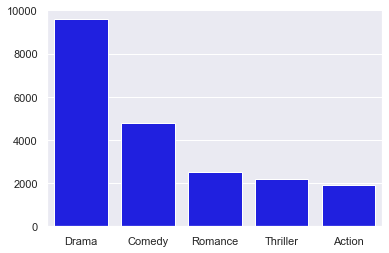

In [143]:
sns.barplot(x=list(top5_g4_genres_dict.keys()), y=list(top5_g4_genres_dict.values()), color='blue')

sum:20971
[0.457 0.228 0.12  0.104 0.091]


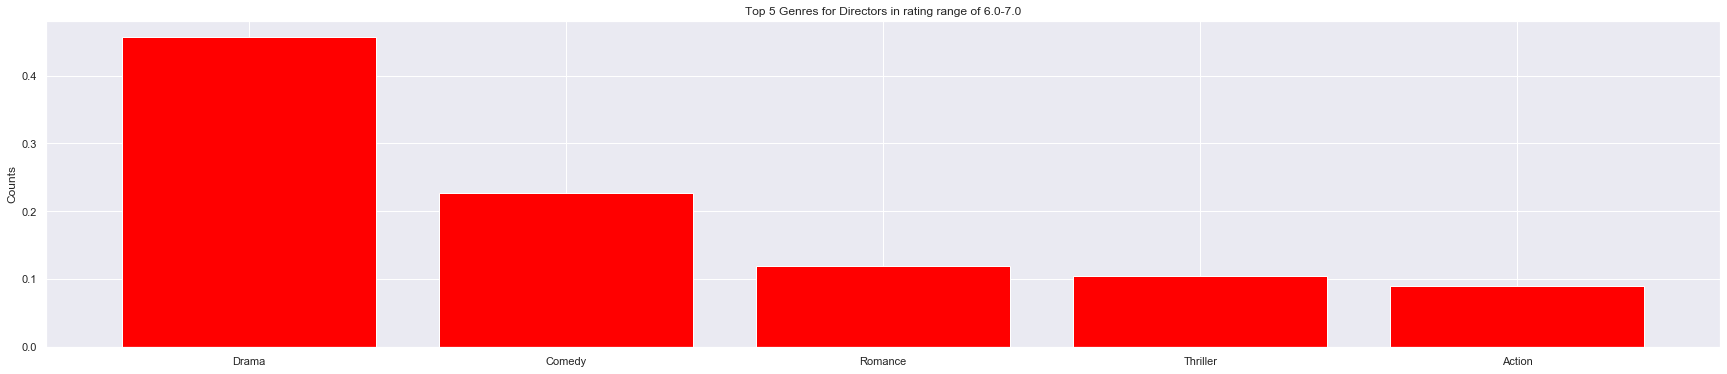

In [144]:
top_5_bar_chart(top5_g4_genres_dict, 'red', 7.0, 6.0, 'Directors', 'Genres')

# Who are Top 100 directors in voted rating range: 6.0-7.0?

In [145]:
q2_gD_directors_dict = cal_director_rate(q2_sortedROI_g4_genres_df, q2_sortedROI_g4_df_cols, 'D')
q2_gD_directors_dict

13
col list is ['nconst', 'primary_profession', 'known_for_titles', 'tconst', 'ordering', 'category', 'primary_title', 'original_title', 'start_year', 'directors', 'averagerating', 'numvotes', 'Drama', 'Romance', 'Thriller', 'Crime', 'History', 'Biography', 'War', 'News', 'Documentary', 'Western', 'Comedy', 'Sport', 'Horror', 'Animation', 'Mystery', 'Action', 'Music', 'Fantasy', 'Sci-Fi', 'Family', 'Adventure', 'Musical', 'Reality-TV']
genre Crime not weighted in group D !
genre History not weighted in group D !
genre War not weighted in group D !
genre News not weighted in group D !
genre Western not weighted in group D !
genre Sport not weighted in group D !
genre Horror not weighted in group D !
genre Animation not weighted in group D !
genre Mystery not weighted in group D !
genre Action not weighted in group D !
genre Music not weighted in group D !
genre Fantasy not weighted in group D !
genre Sci-Fi not weighted in group D !
genre Family not weighted in group D !
genre Adventure

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'Takashi Miike': 200,
 'Sang-soo Hong': 156,
 'Steven Soderbergh': 120,
 'Ryuichi Hiroki': 120,
 'Sion Sono': 119,
 'Yukihiko Tsutsumi': 112,
 'Yoshihiro Fukagawa': 110,
 'Tsutomu Hanabusa': 102,
 'Herman Yau': 102,
 'Takashi Yamazaki': 96,
 'Tim Burton': 96,
 'Kris Smith': 90,
 'Keisuke Yoshida': 90,
 'Mae Czarina Cruz': 84,
 'Anjan Dutt': 84,
 'Sandip Ray': 84,
 'Joram Lürsen': 80,
 'Nobuhiro Yamashita': 80,
 'Takeshi Furusawa': 78,
 'Shinsuke Sato': 78,
 'Drake Doremus': 78,
 'Johnnie To': 75,
 'Jason Reitman': 75,
 'Ho-Cheung Pang': 75,
 'Jun Lana': 75,
 'Stephen Frears': 75,
 'Baltasar Kormákur': 75,
 'Michael Winterbottom': 72,
 'Cathy Garcia-Molina': 72,
 'Rajib Biswas': 72,
 'Álex de la Iglesia': 70,
 'Dan Villegas': 70,
 'David Gordon Green': 70,
 'Dome Karukoski': 70,
 'Victor Vu': 70,
 'Rizal Mantovani': 70,
 'Michael Dowse': 70,
 'Jack Neo': 70,
 'Chris Martinez': 70,
 'Ben Wheatley': 70,
 'Edward Zwick': 68,
 'David Lowery': 68,
 'Yûichi Satô': 68,
 'Arindam Sil': 66,
 'S

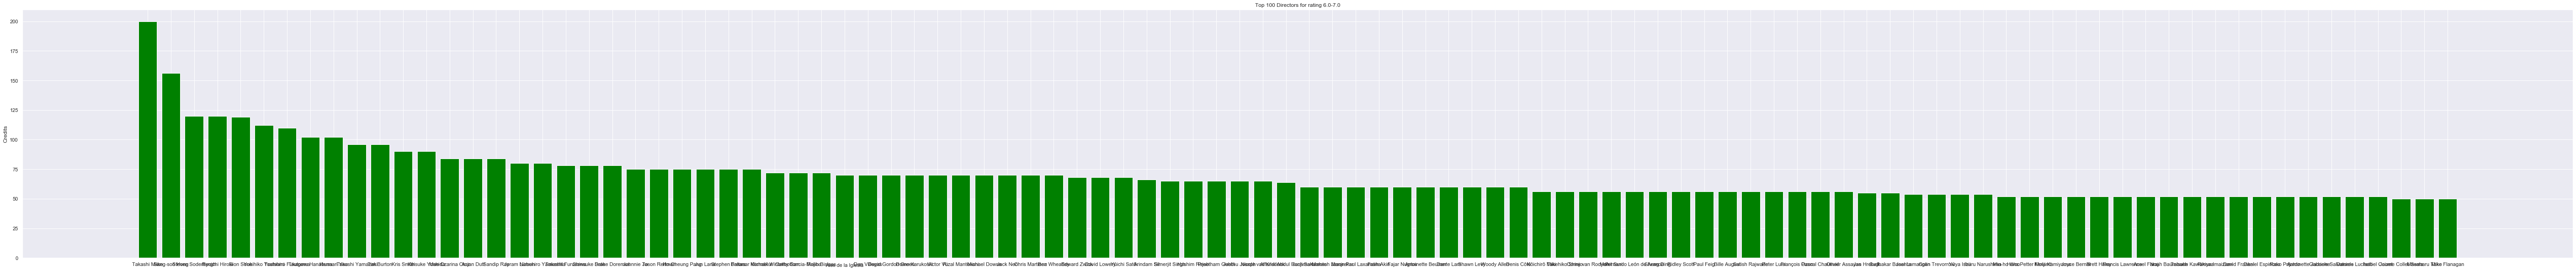

In [146]:
top_100_bar_chart(q2_gD_directors_dict, 'green', 7.0, 6.0, 'Directors')

## Who're Top 100 directors and what're their conducted movies?

In [147]:
q2_gD_directors_movies_dict = get_top_100_director_movie(q2_sortedROI_g4_genres_df, q2_gD_directors_dict)
q2_gD_directors_movies_dict

{'Jaume Collet-Serra': ['Non-Stop',
  'Unknown',
  'Run All Night',
  'The Commuter',
  'The Shallows'],
 'Kôichirô Miki': ['The Travelling Cat Chronicles',
  'Anonymous Noise',
  'Botanical Books',
  'Goose Bumps: The Movie'],
 'Michael Winterbottom': ['The Trip',
  "The Emperor's New Clothes",
  'The Trip to Italy',
  'The Trip to Spain',
  'Everyday',
  'The Killer Inside Me'],
 'Min-ho Woo': ['Inside Men', 'The Spies', 'Man of Vendetta', 'The Drug King'],
 'Junji Sakamoto': ['Someday',
  'A Chorus of Angels',
  'The Projects',
  'Another World',
  'Ernesto'],
 'Álex de la Iglesia': ['Perfect Strangers',
  'The Last Circus',
  'Witching and Bitching',
  'The Bar',
  'As Luck Would Have It'],
 'Dan Villegas': ['Exes Baggage',
  'Mayohan',
  'Hintayan ng langit',
  'How to Be Yours',
  'Always Be My Maybe',
  'The Breakup Playlist',
  'Ilawod'],
 'Takashi Yamazaki': ['Destiny: The Tale of Kamakura',
  'Parasyte: Part 1',
  'Parasyte: Part 2',
  'Friends: Naki on the Monster Island',
 

## Could we find any match from Top 100 (imdb) to Mike's list (tmdb)?

In [148]:
q2_gD_directors_Mikemovies_dict = match_top_100_director_mikemovie(q2_gD_directors_movies_dict, mike_movies_list)
q2_gD_directors_Mikemovies_dict

{'Jaume Collet-Serra': 0,
 'Kôichirô Miki': 0,
 'Michael Winterbottom': 0,
 'Min-ho Woo': 0,
 'Junji Sakamoto': 0,
 'Álex de la Iglesia': 0,
 'Dan Villegas': 0,
 'Takashi Yamazaki': 0,
 'Tim Burton': 0,
 'Hans Petter Moland': 0,
 'Johnnie To': 0,
 'David Gordon Green': 0,
 'Steven Soderbergh': 0,
 'Takeshi Furusawa': 0,
 'Sang-soo Hong': 0,
 'Takehiko Shinjo': 0,
 'Mahesh Manjrekar': 0,
 'Joel Lamangan': 0,
 'Simerjit Singh': 0,
 'Kenji Kamiyama': 0,
 'Corne van Rooyen': 0,
 'Colin Trevorrow': 0,
 'Affandi Abdul Rachman': 0,
 'Arindam Sil': 0,
 'Jason Paul Laxamana': 0,
 'Jason Reitman': 0,
 'Mae Czarina Cruz': 0,
 'Mohit Suri': 0,
 'Anjan Dutt': 0,
 'Dome Karukoski': 0,
 'Fatih Akin': 0,
 'Kris Smith': 0,
 'Fernando León de Aranoa': 0,
 'Tsutomu Hanabusa': 0,
 'Joyce Bernal': 0,
 'Edward Zwick': 0,
 'Sheng Ding': 0,
 'Masaharu Take': 0,
 'Ridley Scott': 0,
 'Paul Feig': 0,
 'Joram Lürsen': 0,
 'Jan Hrebejk': 0,
 'Ho-Cheung Pang': 0,
 'Yûya Ishii': 0,
 'Bille August': 0,
 'Sandip Ray':

## Could we find any matches from Top 100 (imdb) to tmdb movie set?

In [149]:
q2_gD_directors_tmdbmovies_dict = match_top_100_director_rawmovie(q2_gD_directors_movies_dict, tmdb_movies_df)
q2_gD_directors_tmdbmovies_dict

{'Jaume Collet-Serra': ['Non-Stop',
  'Unknown',
  'Run All Night',
  'The Commuter',
  'The Shallows'],
 'Michael Winterbottom': ['The Trip',
  "The Emperor's New Clothes",
  'The Trip to Italy',
  'The Trip to Spain',
  'The Killer Inside Me'],
 'Junji Sakamoto': ['Another World'],
 'Álex de la Iglesia': ['Perfect Strangers',
  'The Last Circus',
  'As Luck Would Have It'],
 'Takashi Yamazaki': ['Parasyte: Part 1', 'Parasyte: Part 2'],
 'Tim Burton': ['Big Eyes',
  'Frankenweenie',
  "Miss Peregrine's Home for Peculiar Children",
  'Alice in Wonderland',
  'Dark Shadows'],
 'Hans Petter Moland': ['A Somewhat Gentle Man'],
 'Johnnie To': ['Drug War', 'Design for Living'],
 'David Gordon Green': ['Stronger',
  'Joe',
  'Halloween',
  'Prince Avalanche',
  'Our Brand Is Crisis'],
 'Steven Soderbergh': ['Logan Lucky',
  'Behind the Candelabra',
  'Contagion',
  'Unsane',
  'Magic Mike'],
 'Takeshi Furusawa': ['Clover'],
 'Sang-soo Hong': ['The Day He Arrives', 'Hahaha', "Claire's Camera"

In [150]:
q2_gD_directors_tmdbmovies_year_dict = year_count_top_100_director_rawmovie(q2_gD_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gD_directors_tmdbmovies_year_dict

{2010: 17,
 2011: 15,
 2012: 19,
 2013: 23,
 2014: 23,
 2015: 31,
 2016: 22,
 2017: 22,
 2018: 27,
 2019: 1}

## What're released years for movies conducted by Top 100 directors?
### * info of movie released years relies on tmdb movie data set

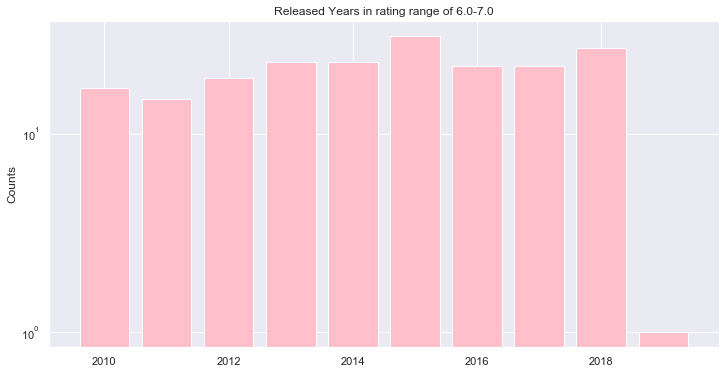

In [192]:
plot_bar_chart(q2_gD_directors_tmdbmovies_year_dict, 'pink', 7.0, 6.0, 'Released Years', 12)

## What's overall average vote for movies conducted by Top 100 directors?
### * info of movie average votes relies on tmdb movie data set

In [193]:
q2_gD_directors_tmdbmovies_vote_dict = vote_top_100_director_rawmovie(q2_gD_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gD_directors_tmdbmovies_vote_dict

{'Baltasar Kormákur': [6.1, 7.3, 6.2, 6.5, 6.2, 7.0, 6.7],
 'Mike Flanagan': [6.4, 6.0, 6.8, 6.0, 6.4, 6.0, 6.4],
 'Ridley Scott': [6.3, 6.4, 5.7, 5.9, 6.4, 5.8, 6.4],
 'Stephen Frears': [5.8, 9.0, 6.3, 6.4, 6.7, 6.9],
 'Tim Burton': [6.6, 6.0, 5.9, 6.8, 7.0, 6.7],
 'David Gordon Green': [6.2, 6.6, 5.9, 5.9, 7.0, 6.4],
 'Jaume Collet-Serra': [6.6, 5.6, 6.8, 6.4, 6.3, 6.2],
 'Masaharu Take': [6.8, 5.8, 5.0, 5.8, 5.4, 5.8, 0.0],
 'Álex de la Iglesia': [6.7, 6.7, 5.9, 7.9, 6.6],
 'Francis Lawrence': [6.9, 6.8, 6.8, 6.8, 6.5],
 'Paul Feig': [6.5, 7.0, 6.6, 6.8, 6.6],
 'David Frankel': [5.8, 6.1, 6.6, 7.2, 7.2],
 'Michael Winterbottom': [5.9, 7.0, 6.5, 6.1, 6.7],
 'Steven Soderbergh': [6.3, 6.1, 6.7, 6.7, 6.2],
 'Jason Reitman': [5.7, 6.9, 6.5, 5.9, 6.9],
 'Edward Zwick': [6.9, 6.7, 5.6, 5.6, 7.0],
 'Daniel Espinosa': [6.4, 6.6, 6.2, 6.1, 6.4],
 'Woody Allen': [5.8, 6.5, 6.4, 6.4, 6.3],
 'Noah Baumbach': [5.9, 5.9, 6.5, 5.9, 6.4],
 'Drake Doremus': [6.5, 6.0, 6.0, 5.8, 6.0],
 'Brett Haley':

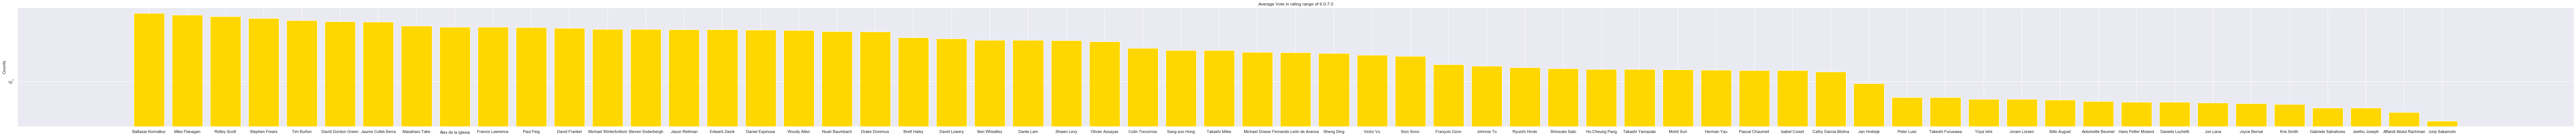

In [194]:
plot_bar_chart(q2_gD_directors_tmdbmovies_vote_dict, 'gold', 7.0, 6.0, 'Average Vote', 126)

## How popular are movies conducted by Top 100 directors?
### * info of movie popularity relies on tmdb movie data set

In [195]:
q2_gD_directors_tmdbmovies_popularity_dict = pop_top_100_director_rawmovie(q2_gD_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gD_directors_tmdbmovies_popularity_dict

{'Ridley Scott': [15.444, 24.98, 0.68, 24.651, 10.941, 39.975, 10.941],
 'Francis Lawrence': [6.209, 33.837, 19.487, 19.487, 18.117],
 'Tim Burton': [22.02, 0.6, 15.75, 14.627, 12.017, 19.132],
 'Jaume Collet-Serra': [12.08, 2.264, 13.562, 17.592, 14.091, 20.063],
 'Daniel Espinosa': [13.116, 7.438, 26.386, 6.425, 17.021],
 'Mike Flanagan': [10.841, 0.6, 12.194, 11.823, 12.583, 11.823, 8.631],
 'Steven Soderbergh': [10.444, 13.7, 6.494, 15.743, 16.316],
 'David Gordon Green': [8.49, 8.57, 8.304, 8.304, 7.836, 20.839],
 'Paul Feig': [9.805, 1.4, 16.912, 12.54, 21.121],
 'Jason Reitman': [8.335, 9.258, 8.658, 16.83, 13.931],
 'Edward Zwick': [10.09, 6.744, 17.085, 17.085, 4.48],
 'Baltasar Kormákur': [7.826, 0.6, 12.357, 14.8, 2.08, 0.6, 16.786],
 'David Lowery': [8.166, 15.734, 11.886, 14.001],
 'David Frankel': [7.077, 8.313, 7.492, 12.857, 12.857],
 'Drake Doremus': [10.091, 8.812, 9.536, 9.256, 8.447],
 'Shawn Levy': [12.498, 0.6, 20.064, 9.681],
 'Colin Trevorrow': [9.214, 20.709, 1

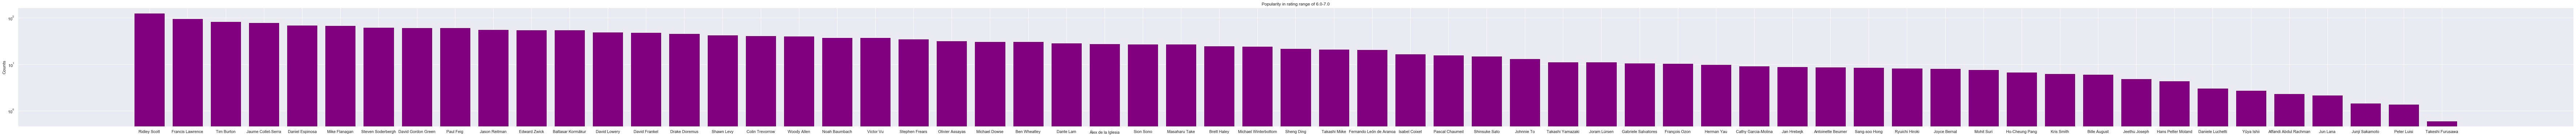

In [196]:
plot_bar_chart(q2_gD_directors_tmdbmovies_popularity_dict, 'purple', 7.0, 6.0, 'Popularity', 126)

## What're primary professions for Top 100 directors?
### * info of director primary profession relies on tmdb movie data set

In [156]:
q2_gD_directors_prof_dict = cal_top_100_director_prof(q2_sortedROI_g4_df, 'primary_profession')
q2_gD_directors_prof_dict

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


{'director': 13988,
 'writer': 11213,
 'producer': 6452,
 'actor': 2750,
 'editor': 2092,
 'assistant_director': 1197,
 'cinematographer': 1103,
 'miscellaneous': 773,
 'camera_department': 529,
 'actress': 442,
 'art_department': 211}

sum:40750
[0.343 0.275 0.158 0.067 0.051 0.029 0.027 0.019 0.013 0.011 0.005]


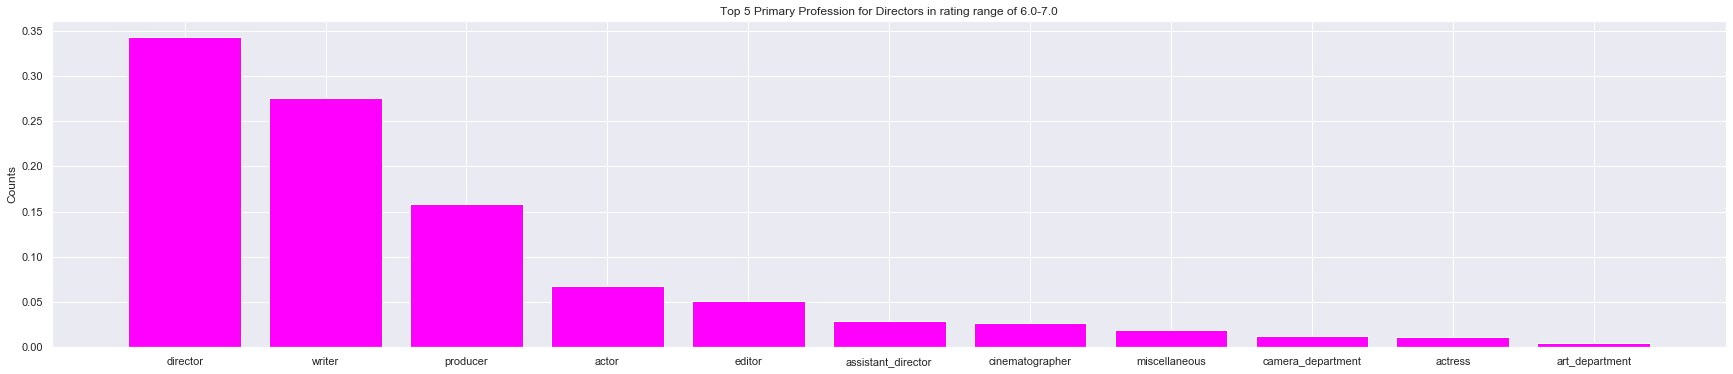

In [157]:
top_5_bar_chart(q2_gD_directors_prof_dict, 'magenta', 7.0, 6.0, 'Directors', 'Primary Profession')

## What's correlation btw vote & popuarity over genres for Top 100 directors?
### * info of vote, popularity, genre relies on tmdb movie data set

In [158]:
q2_gD_directors_tmdbmovies_df = cor_top_100_director_popVSvote(q2_gD_directors_tmdbmovies_dict, tmdb_movies_df)
q2_gD_directors_tmdbmovies_df.head(10)

,vote,popular,vote_doc,popular_doc,vote_dra,popular_dra,vote_com,popular_com,vote_rom,popular_rom,vote_thr,popular_thr,vote_his,popular_his
0,6.6,22.020,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0
1,6.3,15.444,0.0,0.0,6.3,15.444,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0
2,6.0,12.498,0.0,0.0,0.0,0.000,6.0,12.498,0.0,0.000,0.0,0.000,0.0,0.0
3,6.9,10.090,0.0,0.0,6.9,10.090,6.9,10.090,6.9,10.090,0.0,0.000,0.0,0.0
4,6.6,9.241,0.0,0.0,0.0,0.000,6.6,9.241,6.6,9.241,0.0,0.000,0.0,0.0
5,6.1,8.244,0.0,0.0,6.1,8.244,0.0,0.000,6.1,8.244,0.0,0.000,0.0,0.0
6,6.1,7.826,0.0,0.0,6.1,7.826,0.0,0.000,0.0,0.000,6.1,7.826,0.0,0.0
7,6.8,7.607,0.0,0.0,0.0,0.000,6.8,7.607,0.0,0.000,0.0,0.000,0.0,0.0
8,5.9,7.570,0.0,0.0,5.9,7.570,5.9,7.570,5.9,7.570,0.0,0.000,0.0,0.0
9,5.8,7.364,0.0,0.0,0.0,0.000,5.8,7.364,5.8,7.364,0.0,0.000,0.0,0.0


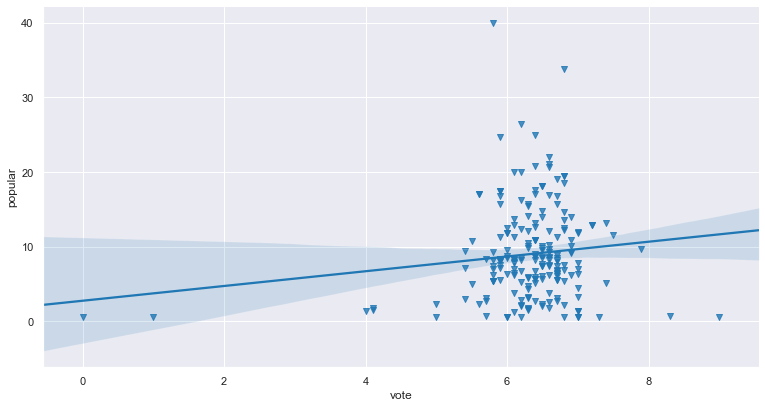

In [159]:
plot_reg(q2_gD_directors_tmdbmovies_df, 'vote', 'popular')

# Conclusion:

## * Director's primary profession is irrelevant to movie genres
## * More popular movies tend to attract more votes

## Money plot for Top 5 genres 

In [160]:
data1 = [{'Genre': 'Documentary', 'Rate': 'A (9-10)', 'Ratio': 0.482},
         {'Genre': 'Documentary', 'Rate': 'B (8-9)', 'Ratio': 0.290},
         {'Genre': 'Documentary', 'Rate': 'C (7-8)', 'Ratio': 0.198},
         {'Genre': 'Documentary', 'Rate': 'D (6-7)', 'Ratio': 0.000},
         {'Genre': 'Drama', 'Rate': 'A (9-10)', 'Ratio': 0.297},
         {'Genre': 'Drama', 'Rate': 'B (8-9)', 'Ratio': 0.407},
         {'Genre': 'Drama', 'Rate': 'C (7-8)', 'Ratio': 0.432},
         {'Genre': 'Drama', 'Rate': 'D (6-7)', 'Ratio': 0.457},
         {'Genre': 'Comedy', 'Rate': 'A (9-10)', 'Ratio': 0.100},
         {'Genre': 'Comedy', 'Rate': 'B (8-9)', 'Ratio': 0.169},
         {'Genre': 'Comedy', 'Rate': 'C (7-8)', 'Ratio': 0.185},
         {'Genre': 'Comedy', 'Rate': 'D (6-7)', 'Ratio': 0.228},
         {'Genre': 'Biography', 'Rate': 'A (9-10)', 'Ratio': 0.064},
         {'Genre': 'Biography', 'Rate': 'B (8-9)', 'Ratio': 0.072},
         {'Genre': 'Biography', 'Rate': 'C (7-8)', 'Ratio': 0.000},
         {'Genre': 'Biography', 'Rate': 'D (6-7)', 'Ratio': 0.000},
         {'Genre': 'Romance', 'Rate': 'A (9-10)', 'Ratio': 0.000},
         {'Genre': 'Romance', 'Rate': 'B (8-9)', 'Ratio': 0.000},
         {'Genre': 'Romance', 'Rate': 'C (7-8)', 'Ratio': 0.099},
         {'Genre': 'Romance', 'Rate': 'D (6-7)', 'Ratio': 0.120},
         {'Genre': 'Thriller', 'Rate': 'A (9-10)', 'Ratio': 0.000},
         {'Genre': 'Thriller', 'Rate': 'B (8-9)', 'Ratio': 0.061},
         {'Genre': 'Thriller', 'Rate': 'C (7-8)', 'Ratio': 0.087},
         {'Genre': 'Thriller', 'Rate': 'D (6-7)', 'Ratio': 0.104}]

data1_df = pd.DataFrame(data1)
data1_df

,Genre,Rate,Ratio
0,Documentary,A (9-10),0.482
1,Documentary,B (8-9),0.290
2,Documentary,C (7-8),0.198
3,Documentary,D (6-7),0.000
4,Drama,A (9-10),0.297
5,Drama,B (8-9),0.407
6,Drama,C (7-8),0.432
7,Drama,D (6-7),0.457
8,Comedy,A (9-10),0.100
9,Comedy,B (8-9),0.169


In [161]:
pivot = data1_df.pivot(index='Genre', columns='Rate', values='Ratio')
pivot

Rate,A (9-10),B (8-9),C (7-8),D (6-7)
Genre,,,,
Biography,0.064,0.072,0.000,0.000
Comedy,0.100,0.169,0.185,0.228
Documentary,0.482,0.290,0.198,0.000
Drama,0.297,0.407,0.432,0.457
Romance,0.000,0.000,0.099,0.120
Thriller,0.000,0.061,0.087,0.104


Text(0.5, 1.0, 'Top 5 Generes that Hired Directors Best Known for in Various Rating Ranges')

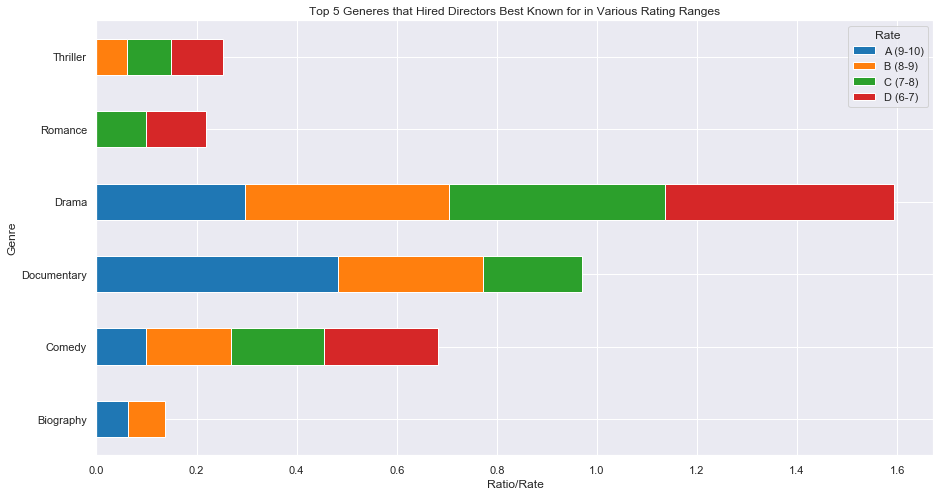

In [162]:
pivot.plot(kind='barh', figsize=(15,8), stacked=True)
plt.xlabel('Ratio/Rate')
plt.title('Top 5 Generes that Hired Directors Best Known for in Various Rating Ranges')

# 3
## Question 3: What're primary professions for Top 100 directors?

In [163]:
data2 = [{'Primary Profession': 'writer', 'Rate': 'A (9-10)', 'Ratio': 0.219},
         {'Primary Profession': 'writer', 'Rate': 'B (8-9)', 'Ratio': 0.230},
         {'Primary Profession': 'writer', 'Rate': 'C (7-8)', 'Ratio': 0.256},
         {'Primary Profession': 'writer', 'Rate': 'D (6-7)', 'Ratio': 0.275},
         {'Primary Profession': 'producer', 'Rate': 'A (9-10)', 'Ratio': 0.186},
         {'Primary Profession': 'producer', 'Rate': 'B (8-9)', 'Ratio': 0.182},
         {'Primary Profession': 'producer', 'Rate': 'C (7-8)', 'Ratio': 0.173},
         {'Primary Profession': 'producer', 'Rate': 'D (6-7)', 'Ratio': 0.158},
         {'Primary Profession': 'editor', 'Rate': 'A (9-10)', 'Ratio': 0.084},
         {'Primary Profession': 'editor', 'Rate': 'B (8-9)', 'Ratio': 0.076},
         {'Primary Profession': 'editor', 'Rate': 'C (7-8)', 'Ratio': 0.058},
         {'Primary Profession': 'editor', 'Rate': 'D (6-7)', 'Ratio': 0.051},
         {'Primary Profession': 'cinematographer', 'Rate': 'A (9-10)', 'Ratio': 0.057},
         {'Primary Profession': 'cinematographer', 'Rate': 'B (8-9)', 'Ratio': 0.048},
         {'Primary Profession': 'cinematographer', 'Rate': 'C (7-8)', 'Ratio': 0.035},
         {'Primary Profession': 'cinematographer', 'Rate': 'D (6-7)', 'Ratio': 0.027},
         {'Primary Profession': 'actor', 'Rate': 'A (9-10)', 'Ratio': 0.051},
         {'Primary Profession': 'actor', 'Rate': 'B (8-9)', 'Ratio': 0.058},
         {'Primary Profession': 'actor', 'Rate': 'C (7-8)', 'Ratio': 0.064},
         {'Primary Profession': 'actor', 'Rate': 'D (6-7)', 'Ratio': 0.067},
         {'Primary Profession': 'miscellaneous', 'Rate': 'A (9-10)', 'Ratio': 0.022},
         {'Primary Profession': 'miscellaneous', 'Rate': 'B (8-9)', 'Ratio': 0.021},
         {'Primary Profession': 'miscellaneous', 'Rate': 'C (7-8)', 'Ratio': 0.019},
         {'Primary Profession': 'miscellaneous', 'Rate': 'D (6-7)', 'Ratio': 0.027},
         {'Primary Profession': 'camera_department', 'Rate': 'A (9-10)', 'Ratio': 0.021},
         {'Primary Profession': 'camera_department', 'Rate': 'B (8-9)', 'Ratio': 0.023},
         {'Primary Profession': 'camera_department', 'Rate': 'C (7-8)', 'Ratio': 0.017},
         {'Primary Profession': 'camera_department', 'Rate': 'D (6-7)', 'Ratio': 0.013}]

data2_df = pd.DataFrame(data2)
data2_df

,Primary Profession,Rate,Ratio
0,writer,A (9-10),0.219
1,writer,B (8-9),0.230
2,writer,C (7-8),0.256
3,writer,D (6-7),0.275
4,producer,A (9-10),0.186
5,producer,B (8-9),0.182
6,producer,C (7-8),0.173
7,producer,D (6-7),0.158
8,editor,A (9-10),0.084
9,editor,B (8-9),0.076


In [164]:
pivot2 = data2_df.pivot(index='Primary Profession', columns='Rate', values='Ratio')
pivot2

Rate,A (9-10),B (8-9),C (7-8),D (6-7)
Primary Profession,,,,
actor,0.051,0.058,0.064,0.067
camera_department,0.021,0.023,0.017,0.013
cinematographer,0.057,0.048,0.035,0.027
editor,0.084,0.076,0.058,0.051
miscellaneous,0.022,0.021,0.019,0.027
producer,0.186,0.182,0.173,0.158
writer,0.219,0.230,0.256,0.275


Text(0.5, 1.0, 'Top 7 Primary Professions Possessed by Top 100 Directors')

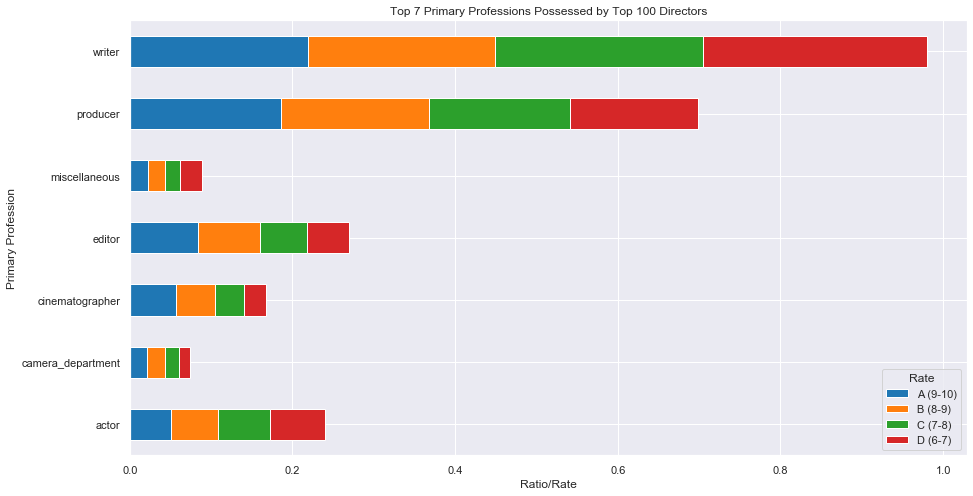

In [165]:
pivot2.plot(kind='barh', figsize=(15,8), stacked=True)
plt.xlabel('Ratio/Rate')
plt.title('Top 7 Primary Professions Possessed by Top 100 Directors')